# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# auto-tidy up of code
%load_ext nb_black

# please no warnings, activate (un-comment) if needed
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn aesthethic settings.
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.1)

# Python, please display the plots
%matplotlib inline

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
# pd.set_option("display.max_rows", 200)

# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Statistical analyses
import scipy.stats as stats
import statsmodels.stats.proportion as proportion

# Randomized data splitting
from sklearn.model_selection import train_test_split

# Model building
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Model tuning
from sklearn.model_selection import GridSearchCV

# Performance measuring
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("INNHotelsGroup.csv")
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

In [3]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

<IPython.core.display.Javascript object>

In [4]:
data.sample(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
31363   INN31364             2               0                     1   
31442   INN31443             2               0                     1   
3916    INN03917             2               2                     1   
21632   INN21633             3               0                     1   
34377   INN34378             2               0                     1   
31720   INN31721             2               0                     0   
143     INN00144             2               0                     2   
34943   INN34944             2               0                     0   
29956   INN29957             2               0                     1   
17727   INN17728             1               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
31363                  2       Meal Plan 1                           0   
31442                  3      Not Selected                           0   
3916                   0       Meal Plan 1                           0   
21632                  0       Meal Plan 1                           0   
34377                  2       Meal Plan 1                           0   
31720                  2      Not Selected                           0   
143                    2       Meal Plan 1                           0   
34943                  1       Meal Plan 1                           1   
29956                  2       Meal Plan 1                           0   
17727                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
31363        Room_Type 1         56          2017              9   
31442        Room_Type 1        117          2018              6   
3916         Room_Type 6         56          2018             12   
21632        Room_Type 4          2          2018              8   
34377        Room_Type 1        305          2018             11   
31720        Room_Type 1          9          2018              8   
143          Room_Type 1        266          2018             10   
34943        Room_Type 1          6          2017              8   
29956        Room_Type 1        159          2018              9   
17727        Room_Type 1        114          2018              7   

       arrival_date market_segment_type  repeated_guest  \
31363            25             Offline               0   
31442             2              Online               0   
3916             19              Online               0   
21632            15              Online               0   
34377             4             Offline               0   
31720            26              Online               0   
143              30              Online               0   
34943            14              Online               0   
29956            19             Offline               0   
17727             1             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
31363                             0                                     0   
31442                             0                                     0   
3916                              0                                     0   
21632                             0                                     0   
34377                             0                                     0   
31720                             0                                     0   
143                               0                                     0   
34943                             0                                     0   
29956                             0                                     0   
17727                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
31363           185.00000                       0   Not_Canceled  
31442           1

<IPython.core.display.Javascript object>

In [5]:
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [6]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [7]:
data.describe(include="all").T

count unique           top   freq  \
Booking_ID                                 36275  36275      INN00001      1   
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
Booking_ID                                  NaN      NaN        NaN   
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
Booking_ID                                  NaN        NaN        NaN   
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   

<IPython.core.display.Javascript object>

In [8]:
data.isna().sum().sum()  # Total missing data points

0

<IPython.core.display.Javascript object>

In [9]:
data.duplicated().sum()  # total duplicated rows

0

<IPython.core.display.Javascript object>

In [10]:
data.groupby("repeated_guest")[
    "no_of_previous_cancellations"
].describe()  # checking internal coherence (only repeated guests should have values)

count    mean     std     min     25%     50%     75%  \
repeated_guest                                                               
0              35345.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
1                930.00000 0.91075 2.11855 0.00000 0.00000 0.00000 1.00000   

                    max  
repeated_guest           
0               0.00000  
1              13.00000

<IPython.core.display.Javascript object>

In [11]:
data.groupby("repeated_guest")[
    "no_of_previous_bookings_not_canceled"
].describe()  # checking internal coherence (only repeated guests should have values)

count    mean     std     min     25%     50%     75%  \
repeated_guest                                                               
0              35345.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
1                930.00000 5.98387 9.23166 0.00000 1.00000 3.00000 6.00000   

                    max  
repeated_guest           
0               0.00000  
1              58.00000

<IPython.core.display.Javascript object>

In [12]:
data.type_of_meal_plan.unique()  # checking category values

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

<IPython.core.display.Javascript object>

In [13]:
data.room_type_reserved.unique()  # checking category values

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

<IPython.core.display.Javascript object>

In [14]:
data.market_segment_type.unique()  # checking category values

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

<IPython.core.display.Javascript object>

In [15]:
data.booking_status.unique()  # checking category values

array(['Not_Canceled', 'Canceled'], dtype=object)

<IPython.core.display.Javascript object>

**Observations:**

* Dataset has 36275 rows (with no duplicates) and 19 columns.
* Appparently no missing (null/NaN) values.
* Data types seem to be OK and coherent with the descriptions in the dictionary, apparently there are no "dirty" values (like numerical columns with commas or currency symbols).
* Some categorical variables are represented by integers (0-1): **required_car_parking_space** and **repeated_guest**, so they are already (and conveniently) one-hot-encoded.
* From the statistical summary some observations can be obtained:
    * **no_of_adults** ranges between 0 and 4, with a mean of 1.84 and a median of 2. Most reservations include up to 2 adults.
    * **no_of_children** ranges between 0 and 10 (possibly mistypes?) with a mean of 0.11. Most reservations don't include children.
    * **no_of_weekend_nights** ranges between 0 and 7 days with a mean of 0.81. Half the reservations include up to 1 weekend night; most of them include up to 2 nights.
    * **no_of_week_nights** ranges between 0 and 17 days, with a mean of 2.2 and a median of 2 days. Most reservations don't exceed 3 weekday nights.
    * **type_of_meal_plan**'s most frequent value is 'Meal Plan 1' among 4 possible values (3 different meal plans plus a 'Not Selected' option).
    * Reservations with **required_car_parking_space** are about 3% of the total. Needless to say, most reservations don't require a parking space.
    * **room_type_reserved**'s most frequent value is 'Room_Type 1' among 7 posible room types.
    * **lead_time** ranges between 0 and 443 days, with a mean of 85.2 and a median of 57 days. Half the reservations have lead times ranging between 17 and 126 days.
    * **arrival_year** spans the years 2017 and 2018. Most reservations are from the year 2018.
    * **arrival_month** spans the whole 12 months of the year.
    * **arrival_date** spans the whole month.
    * **market_segment_type**'s most frequent value is 'Online' among 5 possible values  ('Offline', 'Online', 'Corporate', 'Aviation', 'Complementary').
    * The proportion of reservations placed by a **repeated_guest** is about 2.6%. Most reservations are from new guests.
    * **no_of_previous_cancellations** range between 0 and 13. Most reservations were placed from guests with no previous cancelations.
    * **no_of_previous_bookings_not_canceled** range between 0 and 58. Most reservations were placed from guests with no previous non-calceled bookings.
    * **avg_price_per_room** ranges between 0 and 540 euro, with a mean of 103.4 and a median of 99.45. Half the reservations' price range between 80.3 and 120 euro.
    * **no_of_special_requests** range between 0 and 5, with a mean of 0.62 and a median of 0, meaning at least half of reservations did not include a special request.
    * **booking_status** column tells us that a majority of reservations (about 67%) were not canceled.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [16]:
# auxiliary functions for visualization (Source: MLS course materials, personalized)

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,  # Number of rows of the subplot grid
                                        sharex = True,  # x-axis will be shared among subplots
                                        gridspec_kw = {"height_ratios": (0.3, 0.7)},
                                        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data = data, 
                x = feature, 
                ax = ax_box2, 
                showmeans = True, 
                color="#b7c9e2")  # boxplot will be created and a triangle will indicate the mean value of the column
    
    sns.histplot(data=data, 
                 x=feature, 
                 kde=kde, 
                 ax=ax_hist2, 
                 bins=bins, 
                 color='#f28500') if bins else sns.histplot(data=data, 
                                                            x=feature, 
                                                            kde=kde, 
                                                            ax=ax_hist2,
                                                            color='#f28500')  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="red", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram



<IPython.core.display.Javascript object>

In [17]:
# auxiliary functions for visualization (Source: MLS course materials) part 2


def labeled_barplot(data, feature, size=6, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    size: size factor (6 is default)
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + int(size / 4), size))
    else:
        plt.figure(figsize=(n + int(size / 4), size))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="colorblind",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

<IPython.core.display.Javascript object>

In [18]:
# auxiliary functions for visualization (Source: MLS course materials) part 3

# relationship between 2 categorical variables using a pandas crosstab and a stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * (31 + max([14, len(predictor)])))
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [19]:
# auxiliary functions for visualization (Source: MLS course materials) part 4

# function to plot distributions vs target classification target value


def distribution_plot_wrt_target(data, predictor, target, figsize=(12, 10)):

    fig, axs = plt.subplots(2, 2, figsize=figsize)

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Questions:

#### 1. What are the busiest months in the hotel?

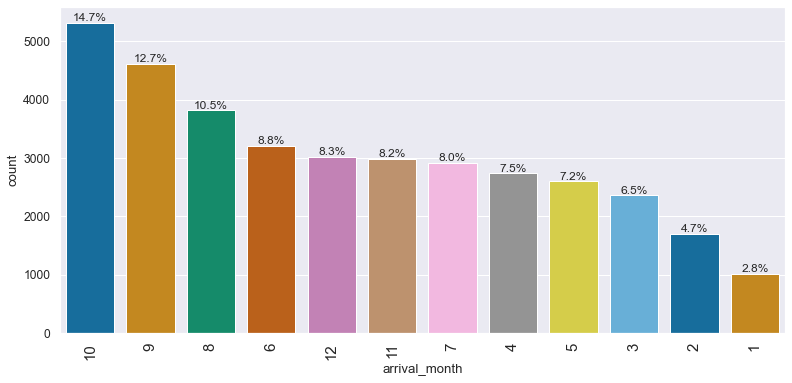

<IPython.core.display.Javascript object>

In [20]:
# labeled barplot with percentages
labeled_barplot(data, "arrival_month", perc=True)

**Answer:**

* The 3 busiest months appear to be August, september and october, with more than 10% of total reservations each.
* Undusprisingly, january and february (north hemisphere winter) are the less busy months.
* Portugal's summer is very hot, so the best time to go on vacation seems to be exactly the three busiest months, when temperatures are nicer and the weather is still sunny.
* Also, as an example, october sports some interesting events in Portugal, like the Lisbon Marathon, the Lisbon Fashion Week and the French Film Festival.

#### 2. Which market segment do most of the guests come from?

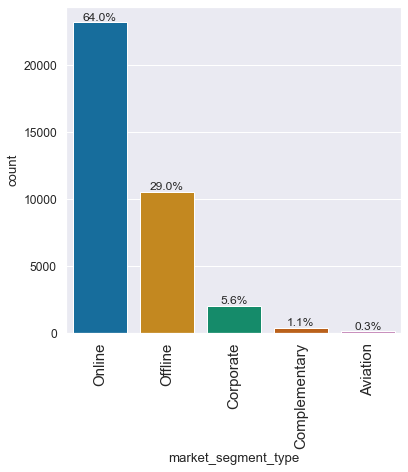

<IPython.core.display.Javascript object>

In [21]:
# labeled barplot with percentages
labeled_barplot(data, "market_segment_type", perc=True)

**Answer:**

* Most guests (64%) come from the "Online" market segment.
* Trailing behind is the "Offline" segment with 29% of the reservations.
* A small proportion of reservations come from the Corporate, Complementary and Aviation segments.

#### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

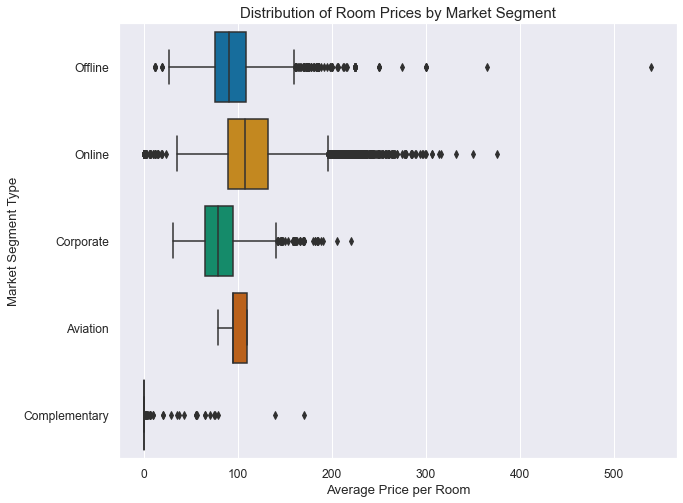

<IPython.core.display.Javascript object>

In [22]:
# plotting the distribution of rrom prices by market segment
plt.figure(figsize=(10, 8))
sns.boxplot(
    data=data, x="avg_price_per_room", y="market_segment_type", palette="colorblind"
)
plt.title("Distribution of Room Prices by Market Segment", fontsize=15)
plt.xlabel("Average Price per Room")
plt.ylabel("Market Segment Type")
plt.show()

In [23]:
# close examination of non-free Complementary segment reservations
data[
    (data["market_segment_type"] == "Complementary") & (data["avg_price_per_room"] > 0)
]["avg_price_per_room"].describe()

count    37.00000
mean     33.20081
std      39.76632
min       1.00000
25%       6.00000
50%       9.00000
75%      55.50000
max     170.00000
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

**Answer:**

* Without taking into account outliers, the Online market segment price distribution shows on average higher prices than the other segments, with more than 50% of reservations costing more than 100 euro.
* The Offline segment has a price distribution that t¿shows lower prices on average, but a few outliers with very high prices. The bulk of these reservations cost less than 100 euro.
* For the corporate segment, at least 75% of reservations cost less than 100 euro. On average, its prices are lower than the previous 2 segments.
* Prices for the Aviation segment are tightly distributed around 100 euro. Could be due to special agreements to keep rates stable.
* Finally, most complementary reservations are free, with a few exceptions costing between 1 and 170 euro

#### 4. What percentage of bookings are canceled? 

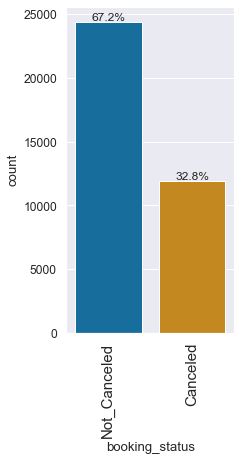

<IPython.core.display.Javascript object>

In [24]:
# labeled barplot with percentages
labeled_barplot(data, "booking_status", perc=True)

**Answer:**

* 32.8% of bookings are canceled.

#### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

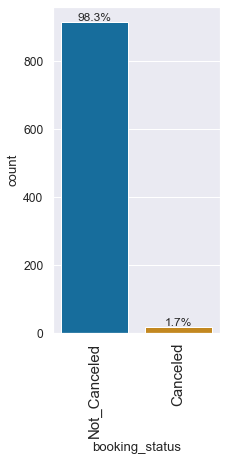

<IPython.core.display.Javascript object>

In [25]:
# labeled barplot with percentages over the filtered dataset (only repeated guests)
labeled_barplot(data[data["repeated_guest"] == 1], "booking_status", perc=True)

**Answer:**

* Only 1.7% of bookings are canceled by repeated guests.

#### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
-----------------------------------------------------


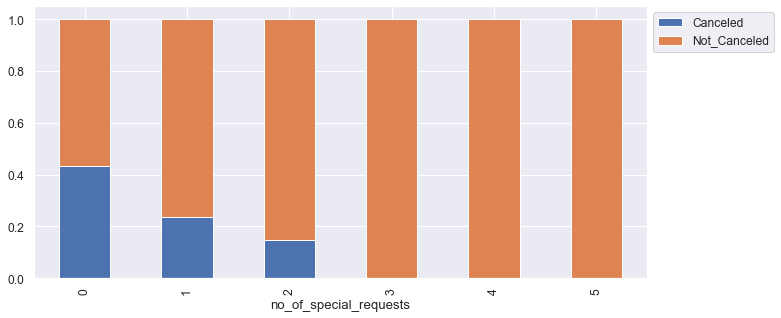

<IPython.core.display.Javascript object>

In [26]:
# this special plot shows the relationship betwen 2 categorical variables
stacked_barplot(data, "no_of_special_requests", "booking_status")

**Answer:**

* The former table and visualization show that indeed special requests affect cancellations.
* While more than 40% of reservations with no special requests are canceled, the proportion is reduced as requests are added. 
* There are no cancellations for reservations with 3 or more special requests.

### Detailed EDA - Univariate Analysis

For the following analysis and subsequent manipulation of the data, a new data frame will be used.

In [27]:
# copying before modifying
df = data.copy()

# replacement of categories with 0 and 1 in target variable (Canceled = 1)
df["booking_status"].replace({"Not_Canceled": 0, "Canceled": 1}, inplace=True)

# dropping Booking ID
df.drop("Booking_ID", axis=1, inplace=True)
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

<IPython.core.display.Javascript object>

In [28]:
# numerical and categorical columns are not related to datatypes (many categorical columns have 0-1 values).
# also, some numerical columns look better analyzed as categories, like the year and month of arrival

num_cols = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "lead_time",
    "arrival_date",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "avg_price_per_room",
    "no_of_special_requests",
]
cat_cols = df.columns.drop(num_cols)

<IPython.core.display.Javascript object>

In [29]:
# extended numerical columns just for heatmap bivariate analysis
num_cols_plus = num_cols + ["arrival_year", "arrival_month", "booking_status"]

<IPython.core.display.Javascript object>

#### Numerical Columns Visualization:



Feature: no_of_adults


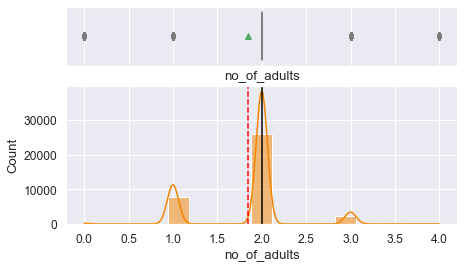



Feature: no_of_children


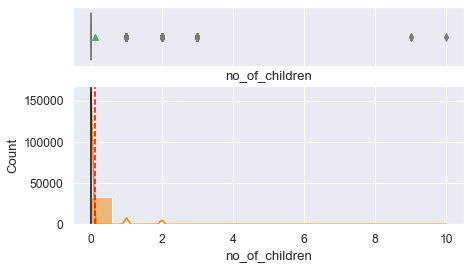



Feature: no_of_weekend_nights


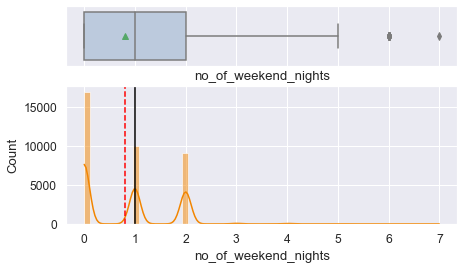



Feature: no_of_week_nights


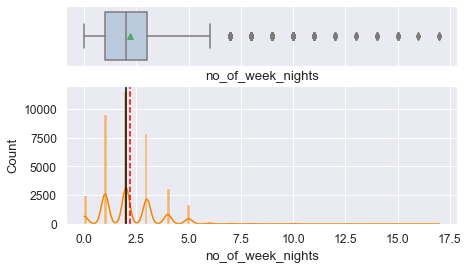



Feature: lead_time


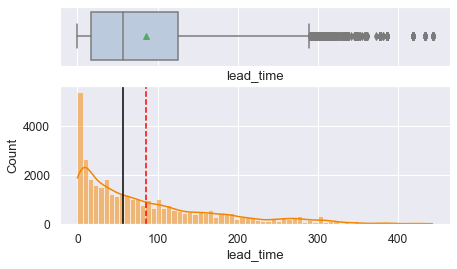



Feature: arrival_date


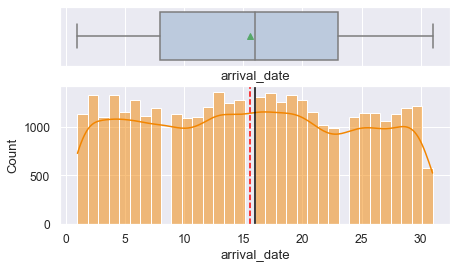



Feature: no_of_previous_cancellations


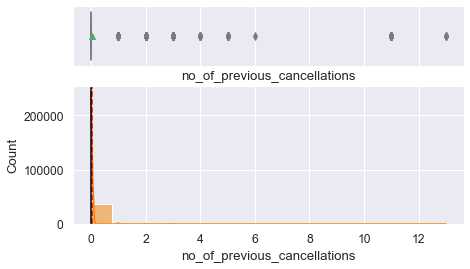



Feature: no_of_previous_bookings_not_canceled


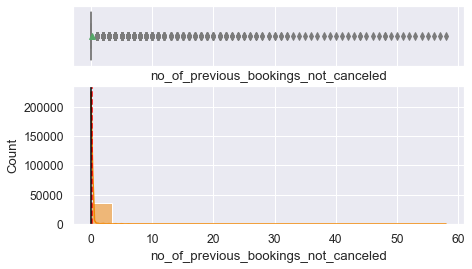



Feature: avg_price_per_room


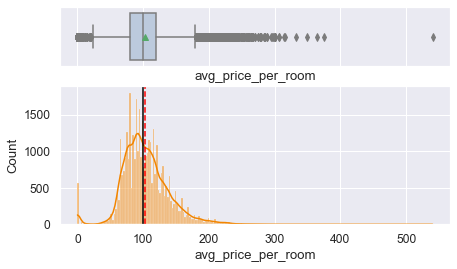



Feature: no_of_special_requests


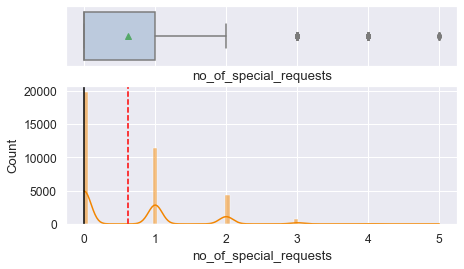

<IPython.core.display.Javascript object>

In [30]:
for cat in num_cols:
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    histogram_boxplot(df, cat, figsize=(7, 4), kde=True)
    plt.show()

**Observations:**

* Most reservations include 2 adults, with a few cases under and over this number. The distribution has a very slight left skew.
* Likewise, most bookings don't include children. Those who do, don't include more than 3, save from a few outliers. The distribution of this variable is extremely right-skewed.
* The number of weekend nights has a right-skewed distribution. The mode is 0 weekend nights. 75% of bookings include 2 or less nights, and any number of nights over 5 is considered an outlier (meaning very long stays spanning more than 2 weeks)
* The number of weekday nights has a right skew distribution. Most bookings have between 1 and 3 weekday nights. Stays with more than 5 nights are rare.
* Lead times have a very right-skewed distribution, with a notorious mode of 0 days (meaning same day reservations). While most reservations are made with less than 100 days of lead time, there's a very long tail spanning up to more than 400 days.
* Arrival dates (meaning the day of the month the reservation is placed in) is not a significative variable and it's shown and kept just for academic purposes (see: Decision Tree Model). Its distribution is almost uniform. Year and month are visualized as categorical variables for aesthethic reasons (see next sub-section)
* The number of previous cancellations is zero for most records which is consistent with repeated guests representing a small proportion of reservations (see categorical variable sub-section). A very thing tail shows up to 13 cancellations (every one considered by the boxplot as outliers due to their small quentity).
* Likewise, the number of previous non canceled bookings shows a very small quantity of records with non-zero values.
* The average price per room follows a quasi-normal distribution with a longer right tail. The mean is "balanced" by a significant quantity of reservations with price = 0 (mostly from the Complementary market segment). Almost every booking has a price lower than 200 euro. Reservations over 300 euro are extremely rare.
* The number of special requests for most reservations are 2 or less, the mode being 0. Very few bookings with 3 to 5 special requests.

#### Categorical Columns Visualization:



Feature: type_of_meal_plan


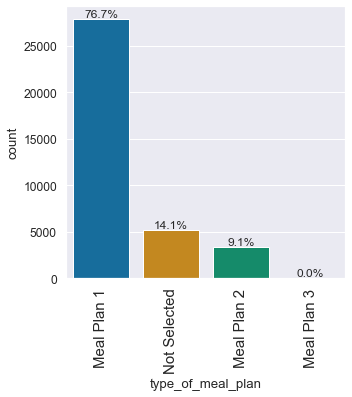



Feature: required_car_parking_space


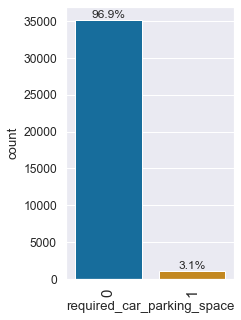



Feature: room_type_reserved


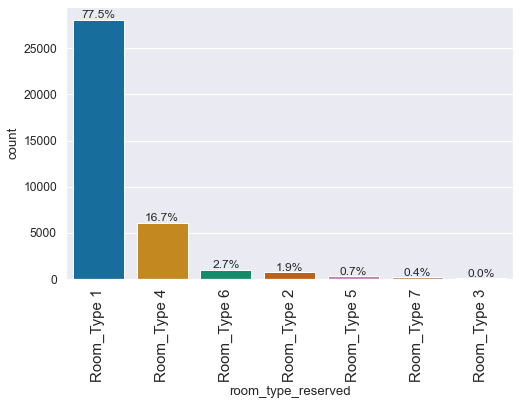



Feature: arrival_year


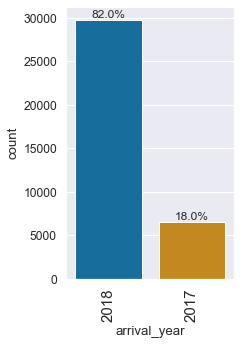



Feature: arrival_month


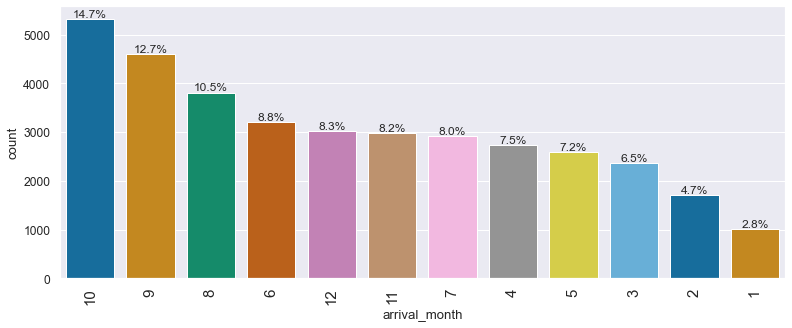



Feature: market_segment_type


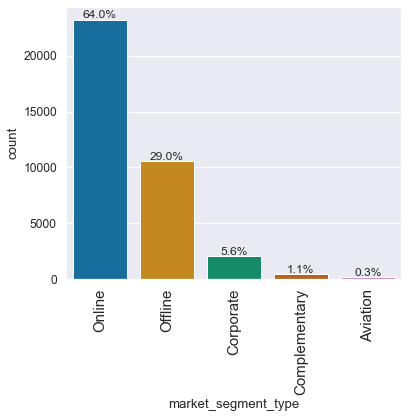



Feature: repeated_guest


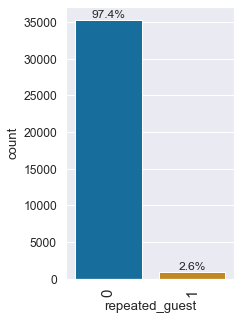



Feature: booking_status


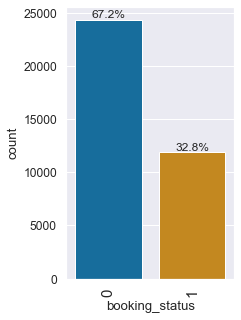

<IPython.core.display.Javascript object>

In [31]:
for cat in cat_cols:
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    labeled_barplot(df, cat, size=5, perc=True)

**Observations:**

* Most bookings (76.7%) ask for just breakfast (Meal Plan 1). 14.1% of them don't select any meal plan. Just 9.1% of reservations include half-board, and almost none select the full board meal plan. This shows most guests would prefer to just have breafast in the hotel and eat out during the day, or at least explore other alternatives.
* Just 3.1% of bookings require parking space, meaning that almost every guest uses cabs or other method of transportation instead of a car.
* By far the most common room reserved is room type 1 (77.5%). Trailing far behind is type 4 (16.7%). The rest represent a very small proportion of the total.
* 82% of the records are from the year 2018, while the rest are from 2017.
* As said before, the high season appears to be from august to october because of the milder temperatures and many cultural and sports events, while the colder months (january and february) are the least busy months.
* The most frequent market segment is the online segment, with 64% of bookings, followed by the offline segment with a 29%. The rest of market segments have less than 6% each.
* 32.8% of bookings get cancelled.

### Detailed EDA - Multivariate Analysis

#### Correlation Heatmap:

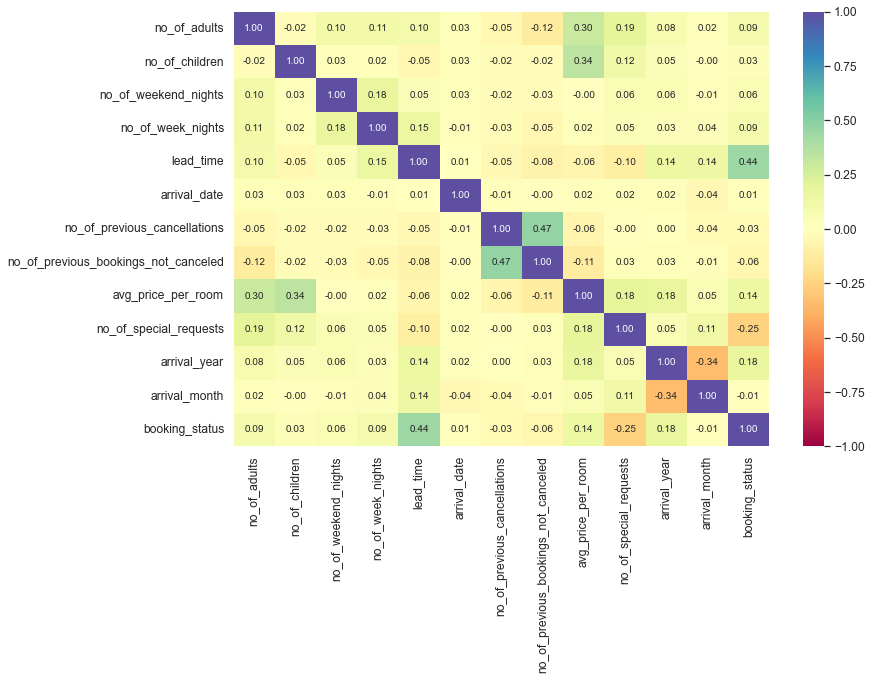

<IPython.core.display.Javascript object>

In [32]:
# Checking the correlations between numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(
    df[num_cols_plus].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
# plt.xticks(rotation=45)
plt.show()

**Observations:**

* The probability of a reservation being canceled shows the following correlations:
    * A positive correlation with respect to the lead time.
    * A positive correlation with respect to the average price per room.
    * A weak negative correlation with respect to the number of special request.
    * There's also a positive correlation with respect to the arrival year, which means that the proportion of cancelations in 2018 might be higher than in 2017. All in all it looks like a spurious correlation.
* Other correlations worth mentioning:
    * The average price per room is positively correlated with the number of adults and children, with a weaker correlation with respect to the number of special requests and the arrival year (the last one might be spurious). Also there's a weak negative correlation with the number of previous non canceled bookings (maybe loyalty discounts).
    * A weak positive correlation between weekday nights and wekend nights (which has some logic behind it).
    * A weak positive correlation between lead times and weekday nights (maybe longer stays needs earlier booking).
    * A weak positive correlation between lead times and arrival year (probably spurious).
    * A weak positive correlation between lead times and arrival month (probably because the busiest months coincidentally have "higher numbers", and might need earlier booking).
    * Previous cancellations and previous bookings not cancelled are positively correlated, perhaps because both are ony present for repeated guests.
    * The number of special requests is also positively (but weakly) correlated with the number of guests (adults and children), and arrival month. It also has a very weak negative correlation with the lead time.
    * There's a spurious negative correlation between year and month of arrival, because the year 2017 only includes months 7 through 12.

#### Exploratory Pairplot:

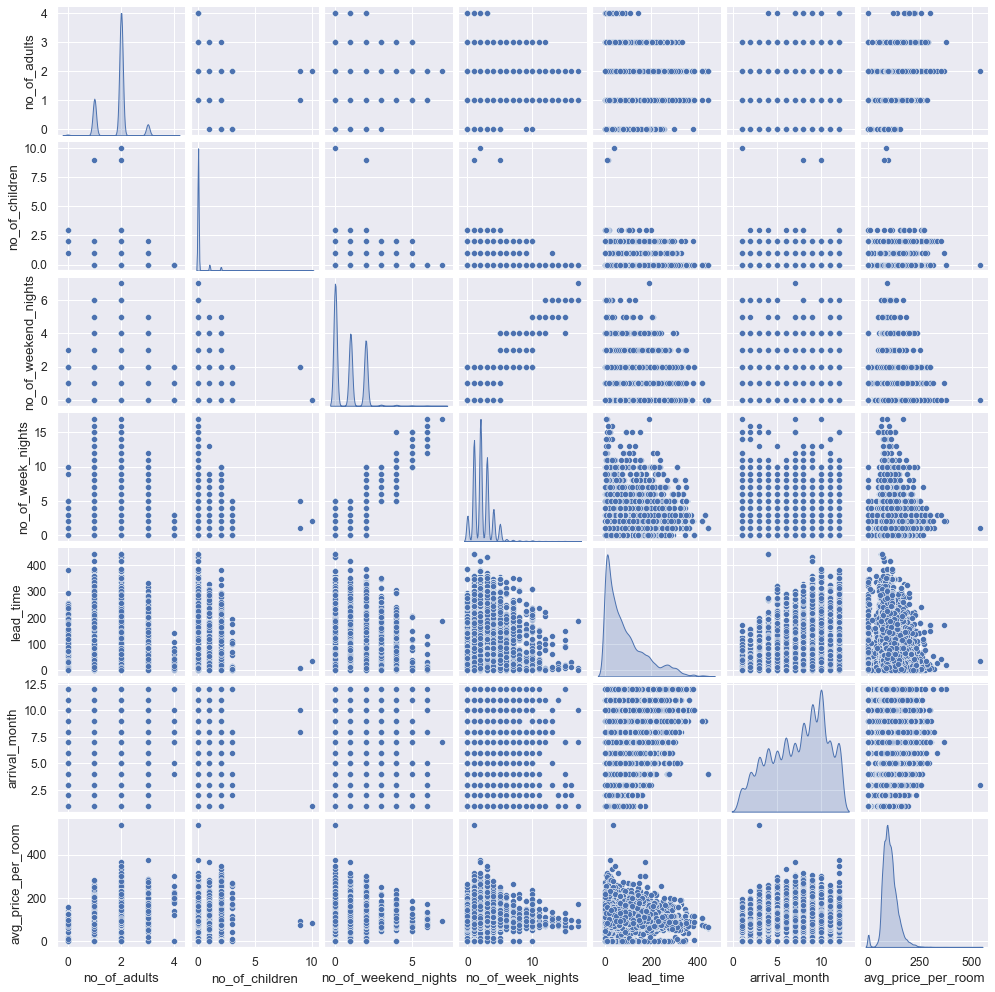

<IPython.core.display.Javascript object>

In [33]:
pair_cols = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "lead_time",
    "arrival_month",
    "avg_price_per_room",
]
sns.pairplot(df[pair_cols], diag_kind="kde", height=2)
plt.show()

**Observations:**

* No further exploration of relationships between numerical columns will add much information, with the exception of avg price per room and lead time vs other numerical variables. These will be shown after exploring in detail the relationship of the target variable vs both numerical and caytegorical variables.

#### Relationship between target categorical variable and numerical columns:



Feature: no_of_adults


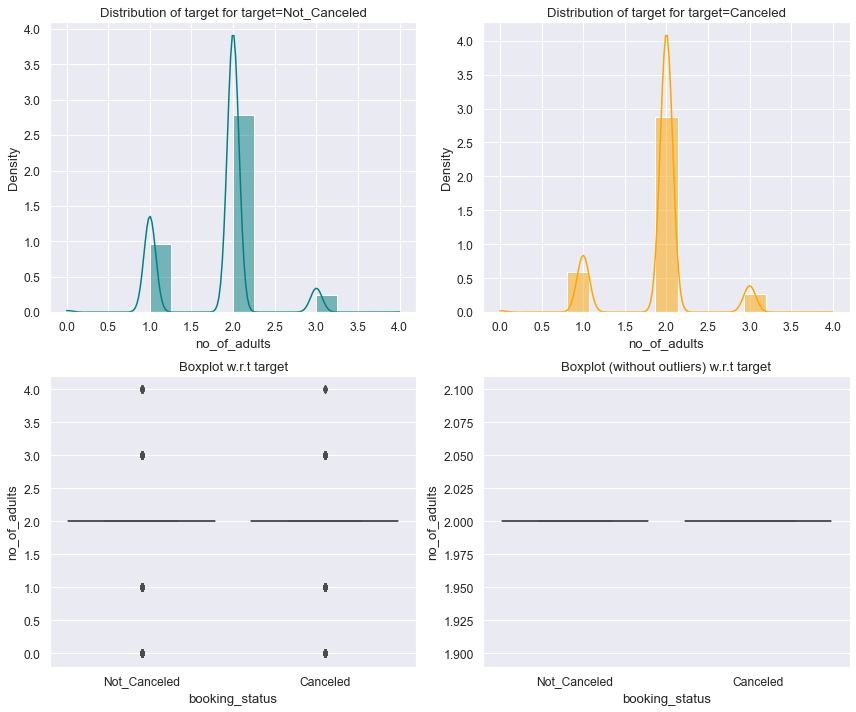



Feature: no_of_children


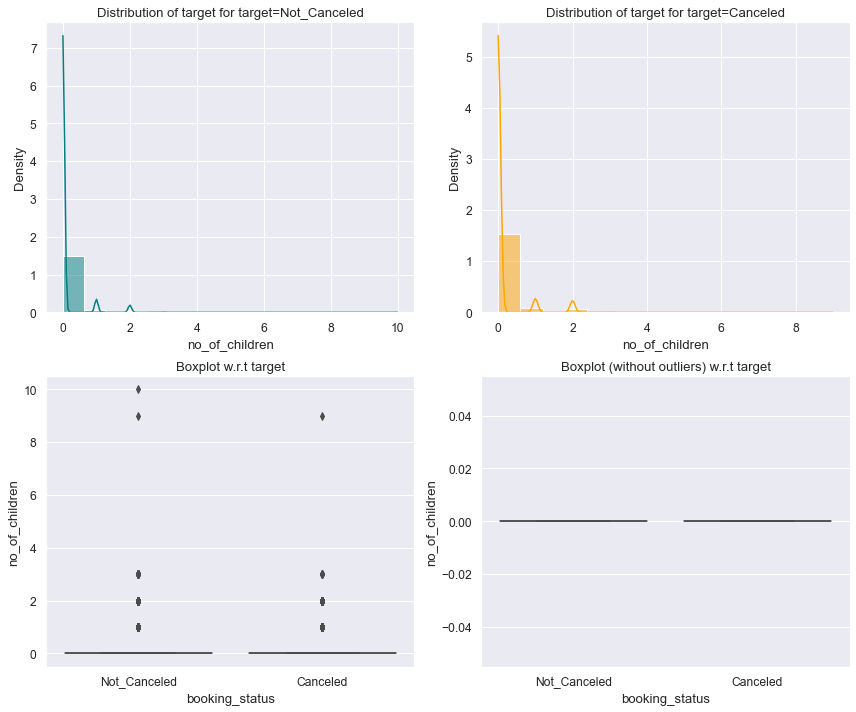



Feature: no_of_weekend_nights


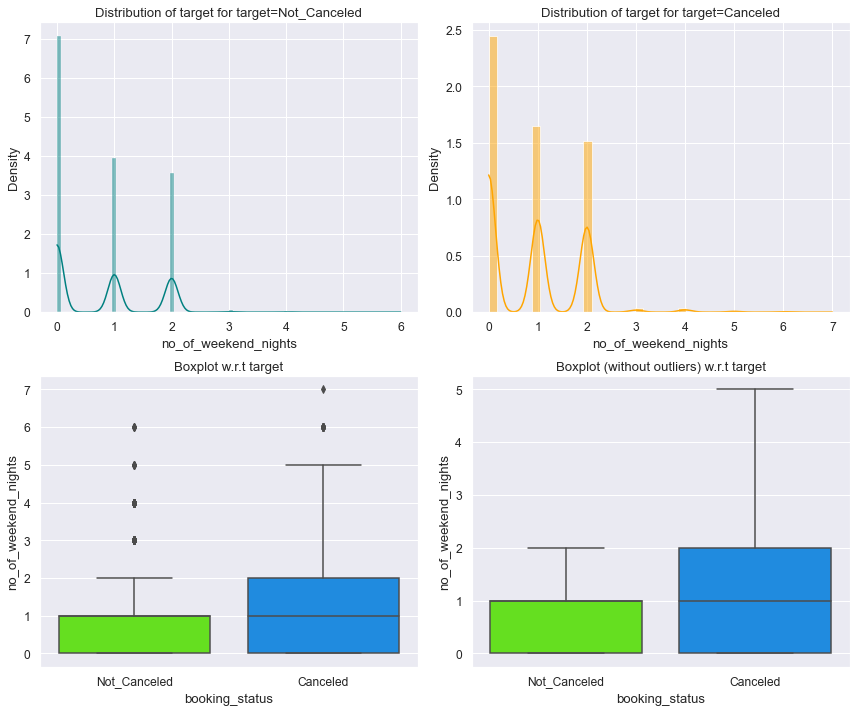



Feature: no_of_week_nights


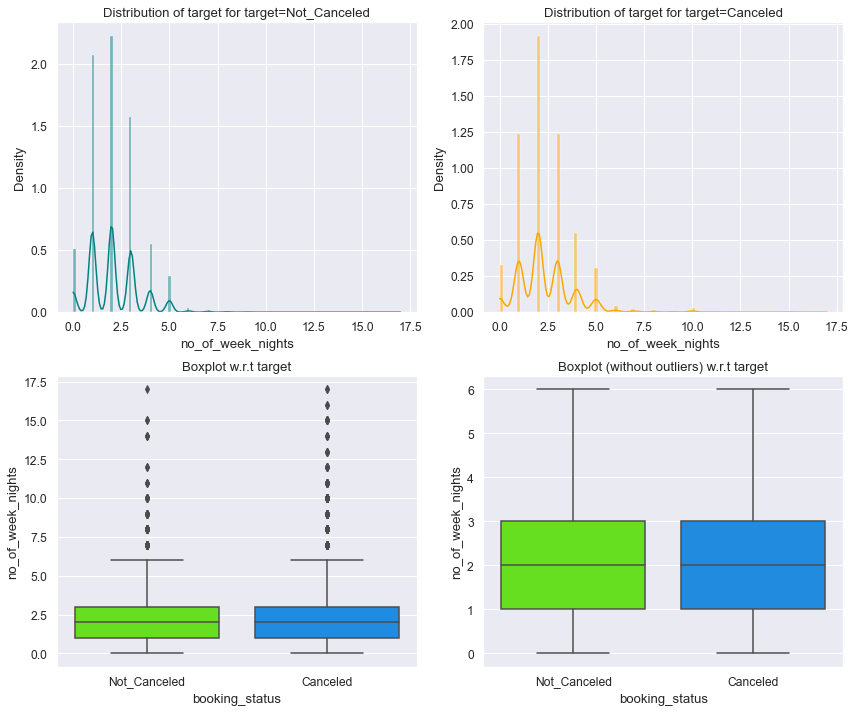



Feature: lead_time


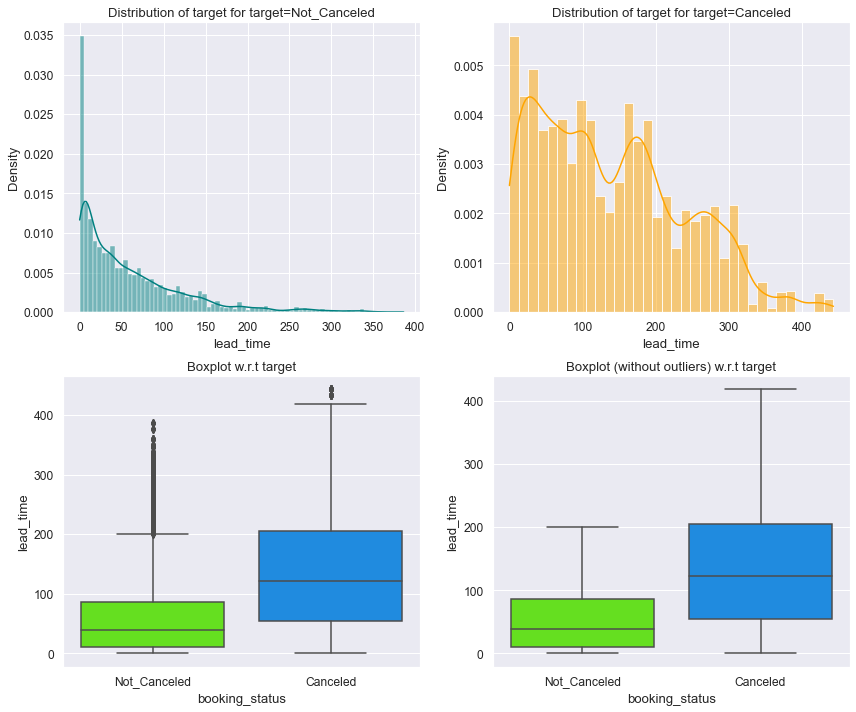



Feature: arrival_date


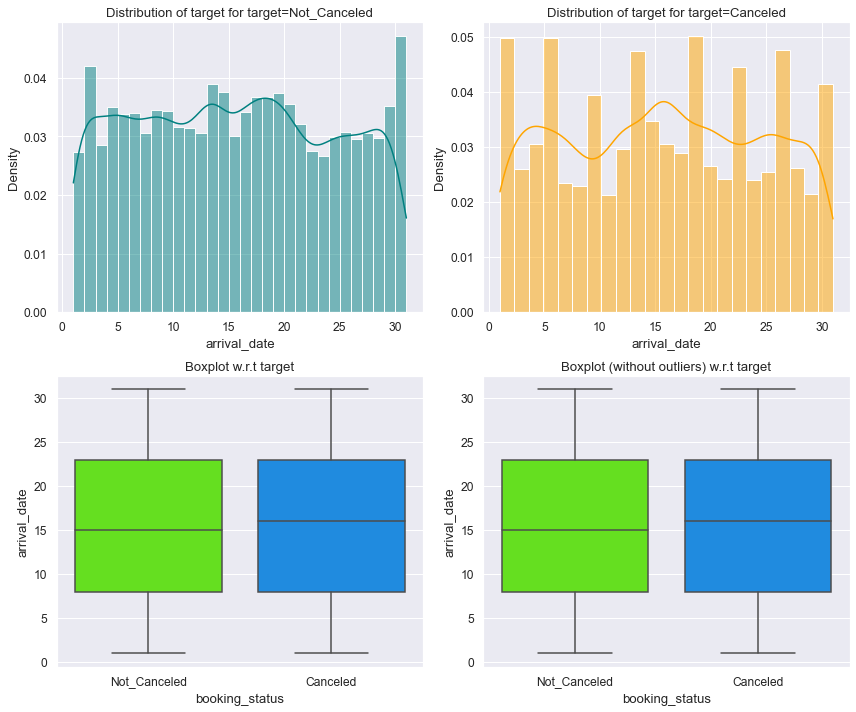



Feature: no_of_previous_cancellations


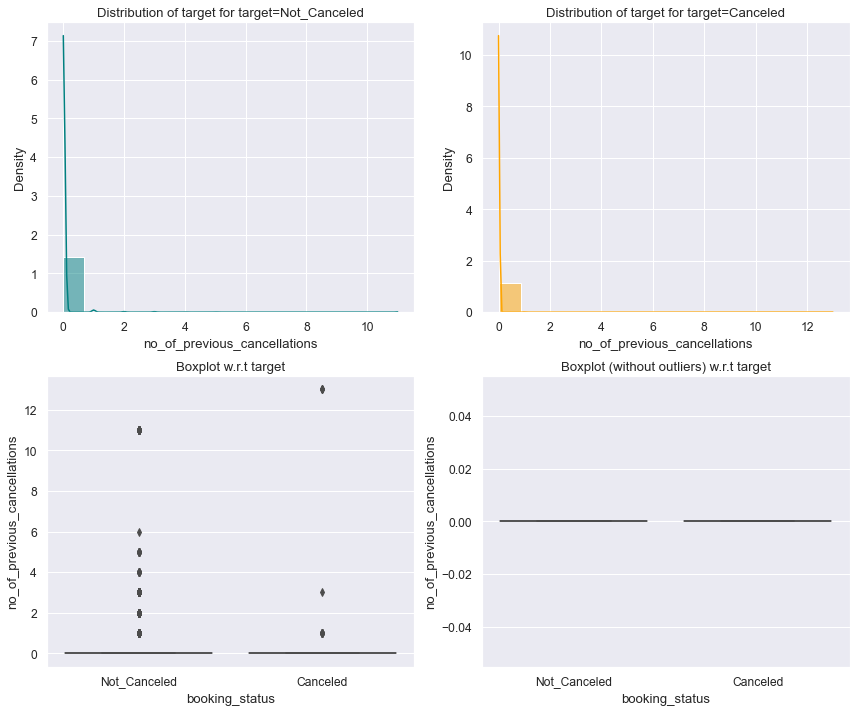



Feature: no_of_previous_bookings_not_canceled


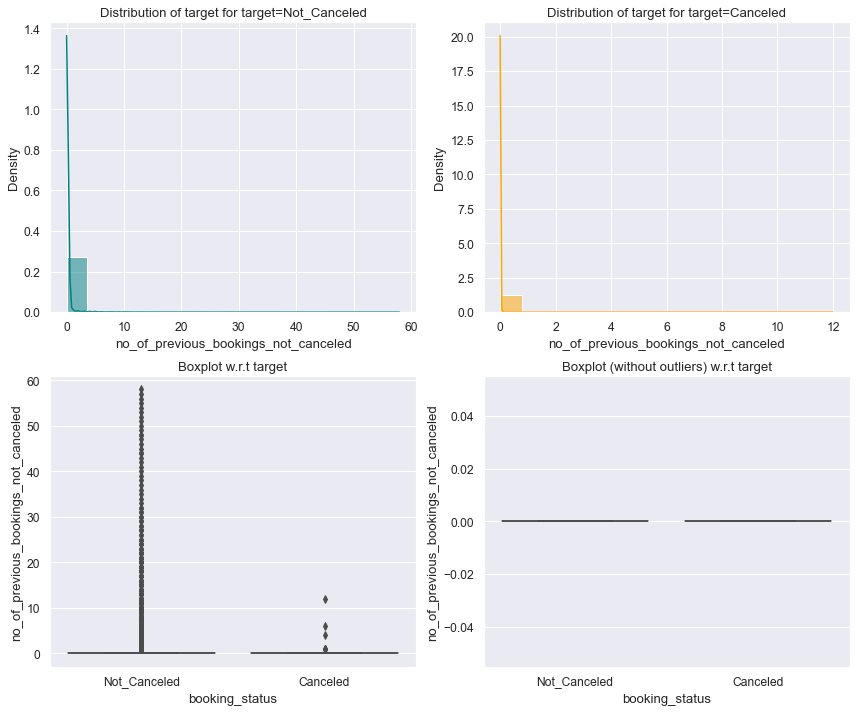



Feature: avg_price_per_room


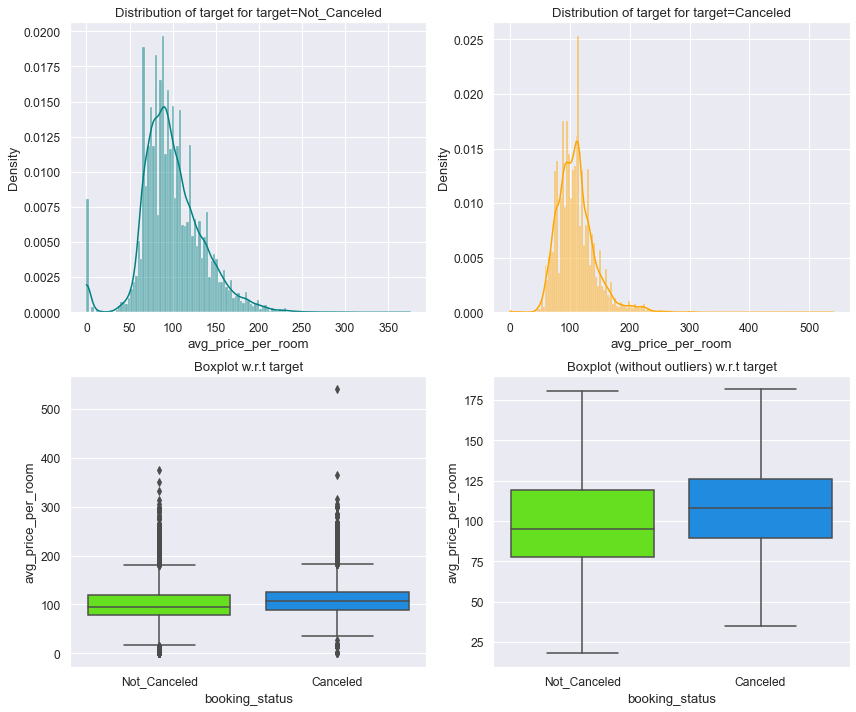



Feature: no_of_special_requests


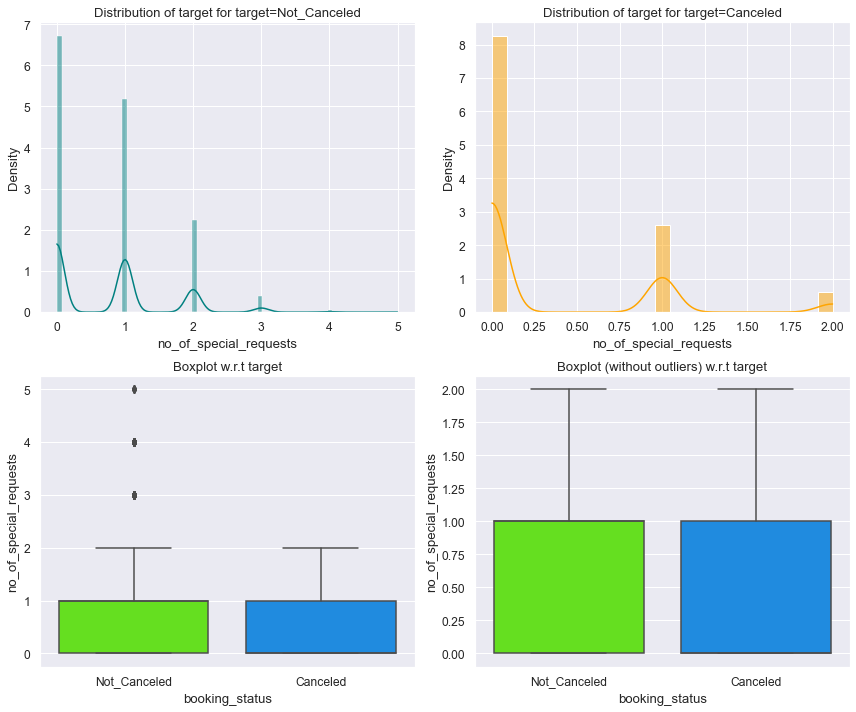

<IPython.core.display.Javascript object>

In [34]:
for cat in num_cols:
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    distribution_plot_wrt_target(data, cat, "booking_status")

**Observations:**

* The number of adults seems to have an almost negligible influence in cancelations.
* Likewise, no significant influence from the number of children.
* The number of weekend nights seem to be distributed over a higher quantity for canceled bookings.
* On the other hand, there does not seem to be the same effect with respect to weekday nights.
* Lead times do seem to be significantly related to cancelations. Canceled bookings have a distribution of lead times that is on average noticeably higher.
* Arrival dates doesn't seem to have any relationship with the target variable.
* The behavior of previous bookings, either canceled or not, don't seem to have any noticeable influence on cancelations.
* Average price per room seems to have a small but noticeable influence on cancelations. Canceled bookings are more expensive on average.
* As per this visualization, the bulk of bookings won't show any significant relationship between the number of special requests and cancelations. We know from previous explorations that bookings with higher numbers of special requests have less or no cancelations, but now we can see that those are small numbers and might be of little significance.

#### Relationship between target categorical variable and categorical columns:



Feature: type_of_meal_plan
booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------


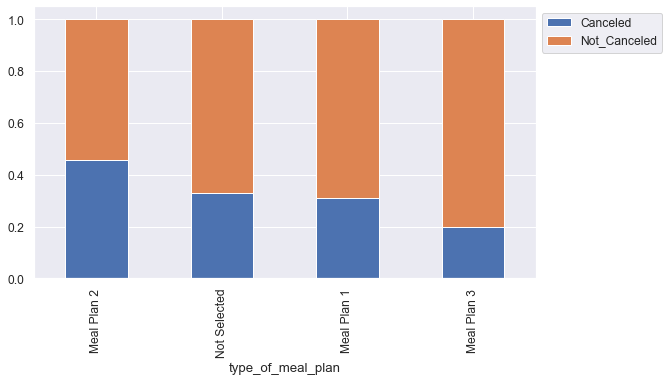



Feature: required_car_parking_space
booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
---------------------------------------------------------


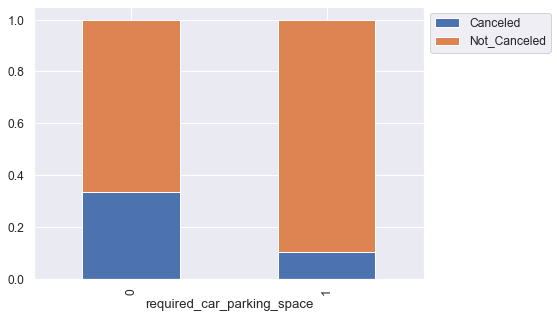



Feature: room_type_reserved
booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
-------------------------------------------------


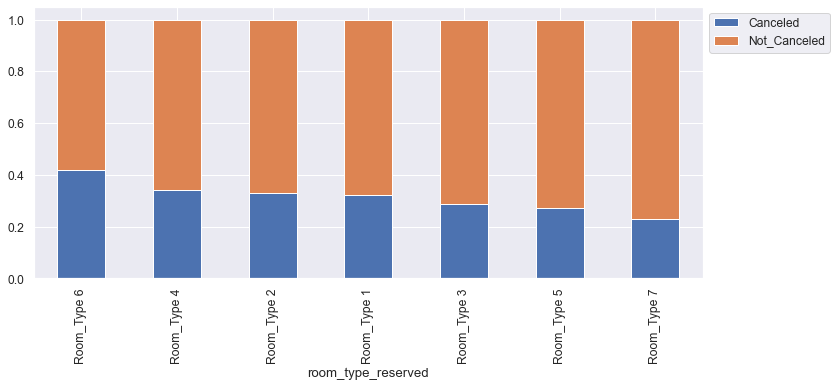



Feature: arrival_year
booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
---------------------------------------------


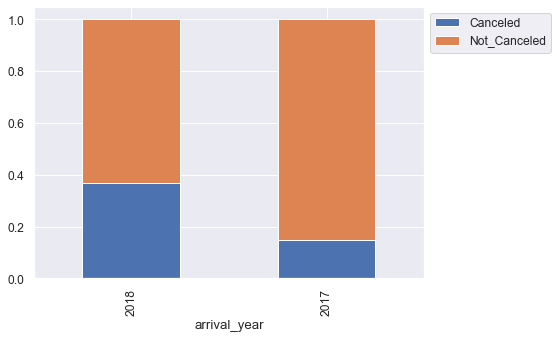



Feature: arrival_month
booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
---------------------------------------------


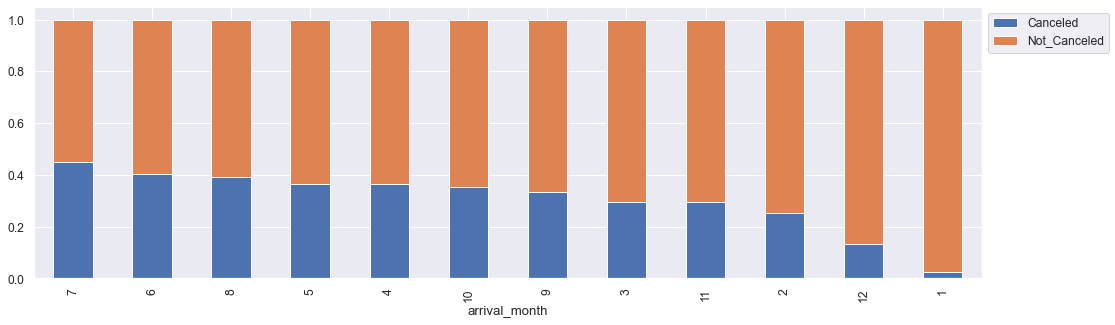



Feature: market_segment_type
booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
--------------------------------------------------


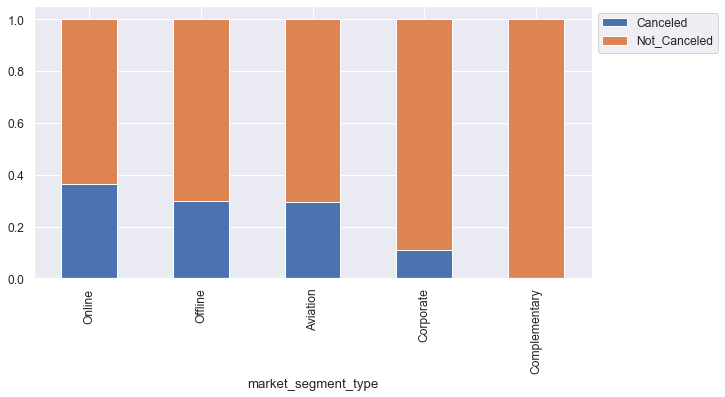



Feature: repeated_guest
booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
---------------------------------------------


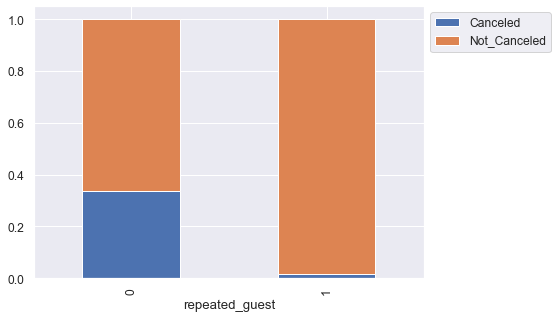

<IPython.core.display.Javascript object>

In [35]:
for cat in cat_cols.drop("booking_status"):
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    stacked_barplot(data, cat, "booking_status")

**Observations:**

* The type of meal plan seems to be related with cancels, but on the other side, a big proportion of bookings selected meal plan 1 (breakfast). Among the 2 bigger classes (not selected and meal plan 1) there's no noticeable difference in cancelations.
* Availability of parking space looks related to cancelations. Asking for a parking space seems to mean less cancelations. This could mean that parking spaces are very scarce. Also, bookings with parking space are very few, so the effect could be insignificant.
* Regarding room type: the most frequent room type by far is type 1, and the only groups where visually significant differences in relative number of cancelations are shown, are orders of magnitude smaller.
* Year 2017 has much less relative numbers of cancelations, but the disparate range of months represented makes the comparison moot.
* July seems to have the highest proportion of canceled bookings, followed by june, august, may, april. January and december have the least relative number of canceled reservations.
* Online marjet segment bookings have the highest proportion of cancellations, followed by Offline and Aviation segments. Corporate shows much less cancels, while no cancels are registered for complementary segment reservations.
* As shown before, repeated guests show a negligibe number of cancellations.

#### Exploration of relationships between room prices and some numerical columns:

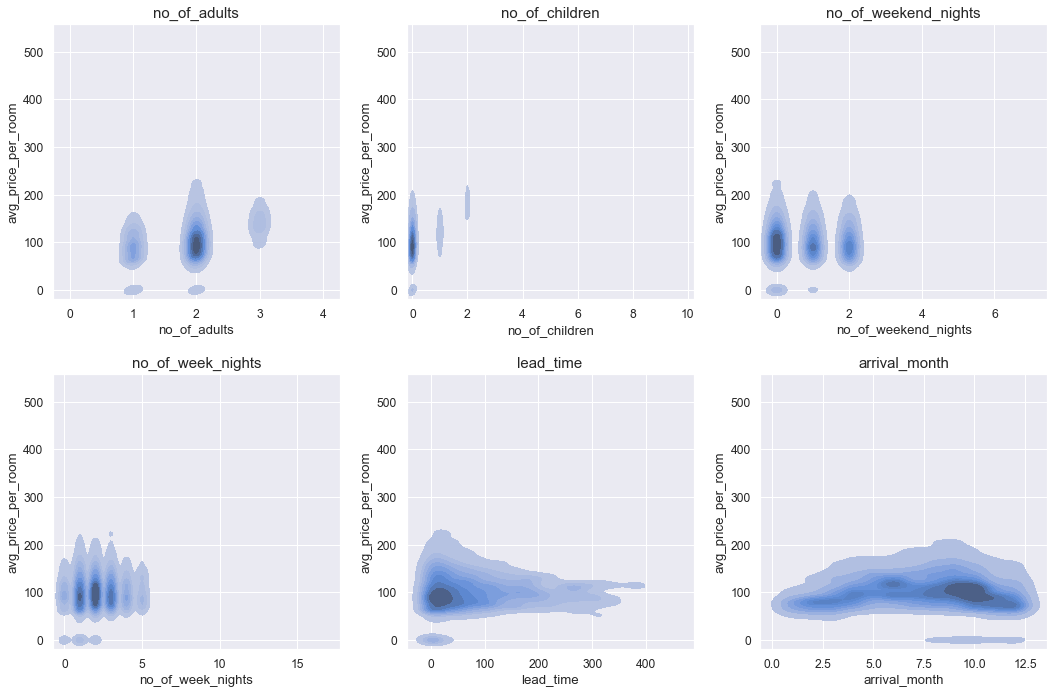

<IPython.core.display.Javascript object>

In [36]:
cols = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "lead_time",
    "arrival_month",
]

plt.figure(figsize=(15, 10))

for i, variable in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data=df, y="avg_price_per_room", x=variable, fill=True)
    plt.title(variable, fontsize=15)
    plt.tight_layout(pad=2)

plt.show()

**Observations:**

* While the price doesn't show a significative relationship with respect to weekend or week nights, there's a hint of a positive relationship between prices and number of guests (adults and children).
* The relationship with respect to lead time and arrival months is very weak to non existent.

#### Exploration of relationships between room lead times and some numerical columns:

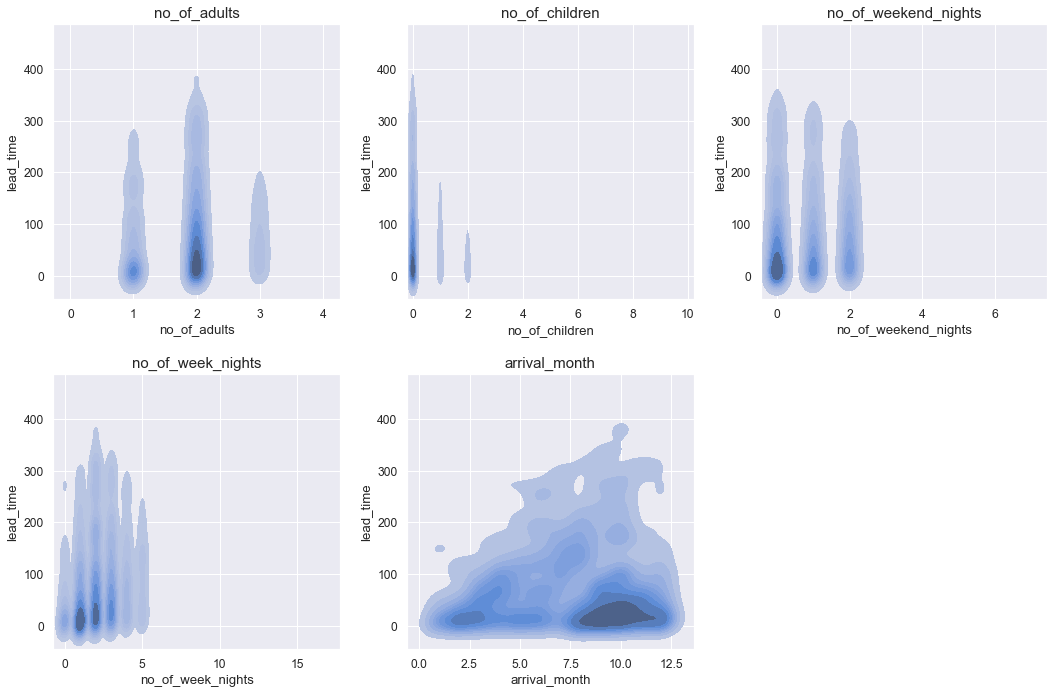

<IPython.core.display.Javascript object>

In [37]:
# avg price excluded (comparison was made in the former visualization)
cols = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "arrival_month",
]

plt.figure(figsize=(15, 10))

for i, variable in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data=df, y="lead_time", x=variable, fill=True)
    plt.title(variable, fontsize=15)
    plt.tight_layout(pad=2)

plt.show()

**Observations:**

* Lead time show some realtionship with respect to arrival month, and a very weak relationship with number of week nights.
* As per the rest of the variables displayed, no significant relationship can be observed.

#### Exploration of relationship of room price vs some categorical variables

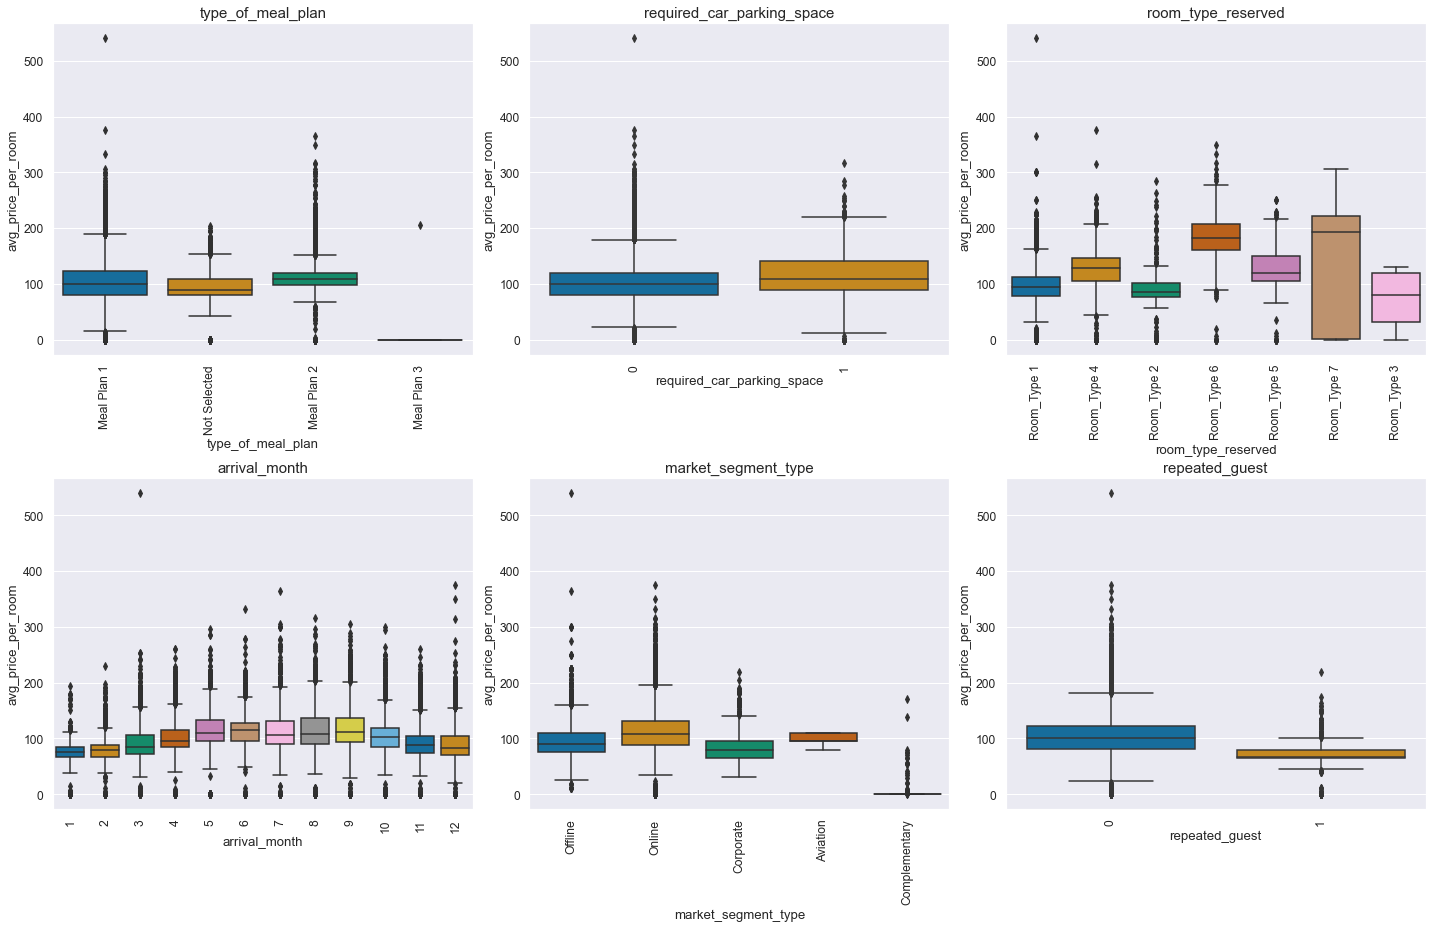

<IPython.core.display.Javascript object>

In [38]:
# variables of interest
cols = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "arrival_month",
    "market_segment_type",
    "repeated_guest",
]
plt.figure(figsize=(20, 13))

for i, var in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=var, y="avg_price_per_room", palette="colorblind")
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* Room average price is strongly affected by room type, arrival month, market segment and if the booking was places by a repeated guest.
    * Most reservations for room types 1 and 2 have most average prices around 100 euro (a little lower for room type 2).
    * Room type 3 (which has extremenly few cases) prices spread between 0 and a little over 100 euro.
    * Room type 6 prices are spread higher than the rest, while prices for room type 7 are widely spread, with most prices ranging between 0 and a little higher than 200 euro.
    * Room types 4 and 5 prices are very similar, and a little higher than for room type 1.
    * May through september is the most expensive season. November through february is the least expensive one.
    * The highest pices are paid by the online segment, followed by aviation and offline segments, while the corporate segment pays the lowest prices, not considering the complementary segment (which by its name suggests gratuity).
    * Repeated guests pay significantly lower average prices than new ones.
* Parking space seems to have a slight influence in the room price, as the meal plan selected.
    * Meal plan 2 bookings seem to be slightly more expensive than the rest, while meal plan 3 (which represents extremely few cases) is mostly related to free rooms.
    * Bookings with parking space included are slightly more expensive.

#### Exploration of relationship of lead time vs some categorical variables

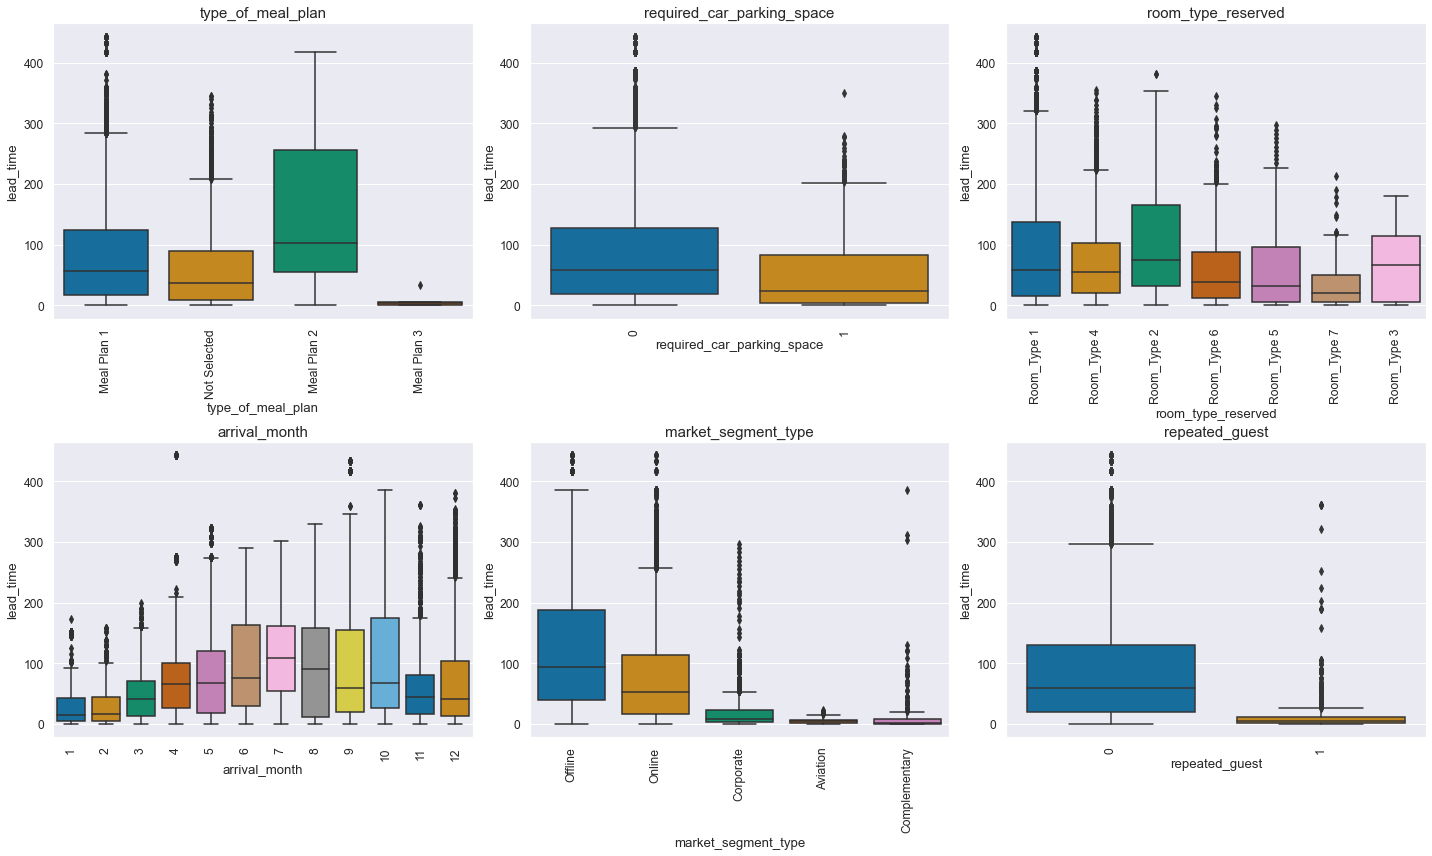

<IPython.core.display.Javascript object>

In [39]:
cols = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "arrival_month",
    "market_segment_type",
    "repeated_guest",
]
plt.figure(figsize=(20, 12))

for i, var in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=var, y="lead_time", palette="colorblind")
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* Reservations where meal plan 2 was selected tend to show longer lead times, with over 50% of them having 100 days or more, while lead times for bookings with meal plans 1 or not selected are mostly distributed below 100 days. Cases with meal plan 3 are very few and show very short lead times.
* Bookings with no required parking space show slightly longer lead times than those without it. As the later category is very small, the difference might be insignificant.
* Room types 1 and 4 (the most significative categories by quantity) show similar median lead times, with most of them being under 100 days, while the distribution for room type 4 looks narrower.
* Room types 5, 6 and 7 show lead times distributions that tend to the shorter end, while the room type 2 has a wider distribution of lead times with higher values on average. Room type 3 category shows a similar distribution as room type 1, but it is insignificant because of its low quantity.
* Bookings with arrival on the months spanning june through october show the widest distributions of lead times with higher values on average, while months like january through may, november and december show lower values. This is consistent with some months being high season and thus requiring earlier bookings.
* Market segments online and offline show significantly higher lead times than other categories, with the Online category having the highest values on average.
* The bulk of repeated guests show very short lead times compared to new guests.

#### Additional exploration of categorical variables that might result in insights of interest:

type_of_meal_plan    Meal Plan 1  Meal Plan 2  Meal Plan 3  Not Selected  \
market_segment_type                                                        
All                        27835         3305            5          5130   
Complementary                370           11            4             6   
Offline                     7988         2365            1           174   
Aviation                     125            0            0             0   
Corporate                   1996            6            0            15   
Online                     17356          923            0          4935   

type_of_meal_plan      All  
market_segment_type         
All                  36275  
Complementary          391  
Offline              10528  
Aviation               125  
Corporate             2017  
Online               23214  
--------------------------------------------------


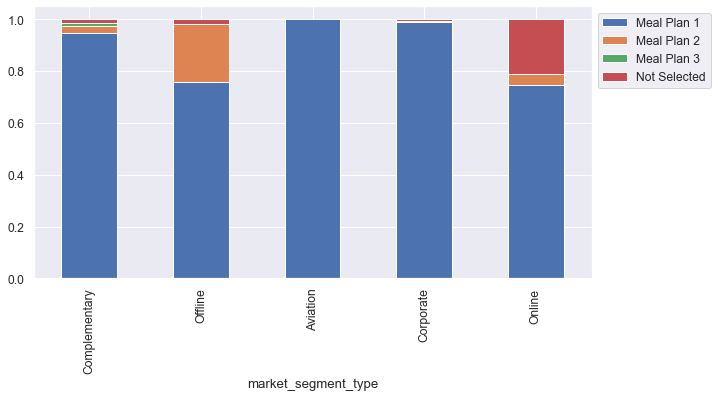

<IPython.core.display.Javascript object>

In [40]:
# meal plan vs market segment
stacked_barplot(data, "market_segment_type", "type_of_meal_plan")

**Observations:**

* This table and visualization lets us conclude that most bookings with meal plan not selected correspond to the Online market segment.
* Also the meal plan 2 is mostly consumed by the Offline segment.

room_type_reserved   Room_Type 1  Room_Type 2  Room_Type 3  Room_Type 4  \
market_segment_type                                                       
All                        28130          692            7         6057   
Complementary                247           20            2           52   
Offline                     9747           57            2          613   
Online                     16243          613            2         5228   
Corporate                   1833            2            1           99   
Aviation                      60            0            0           65   

room_type_reserved   Room_Type 5  Room_Type 6  Room_Type 7    All  
market_segment_type                                                
All                          265          966          158  36275  
Complementary                 17           14           39    391  
Offline                       81           23            5  10528  
Online                        93          926          109 

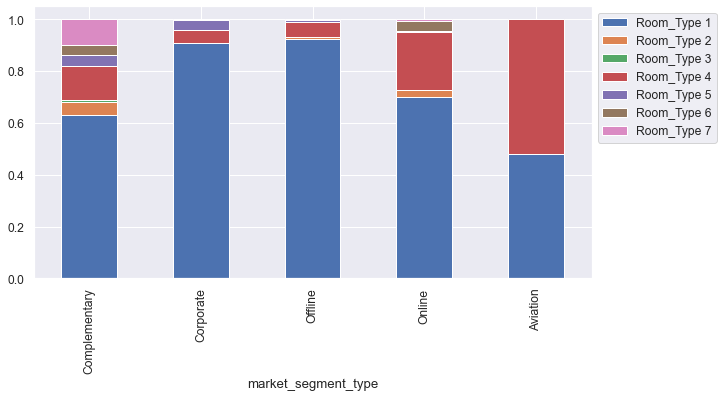

<IPython.core.display.Javascript object>

In [41]:
# room type vs market segment
stacked_barplot(data, "market_segment_type", "room_type_reserved")

**Observations:**

* This table and visualization lets us conclude that the Offline and Corporate segments mostly book the room type 1.
* While the Online segment also prefers room type 1, it has a relatively (and absolute) bigger preference for room type 4 than the Offline and corporate segments.
* The complementary segment has a wider mix of room types, with room type 1 still dominant.
* The tiny Aviation market segment books room types 1 and 4 with almost equal frequency.

market_segment_type  Aviation  Complementary  Corporate  Offline  Online  \
arrival_month                                                              
All                       125            391       2017    10528   23214   
5                          29             23        219      651    1676   
10                         29             45        221     2068    2954   
4                          25             12         65      661    1973   
9                          18             52        258     1592    2691   
11                         12             44        235      801    1888   
6                           6             21         99     1371    1706   
3                           3             23        167      538    1627   
7                           2             18        113      638    2149   
2                           1             18        206      438    1041   
1                           0             30        106      314     564   
8           

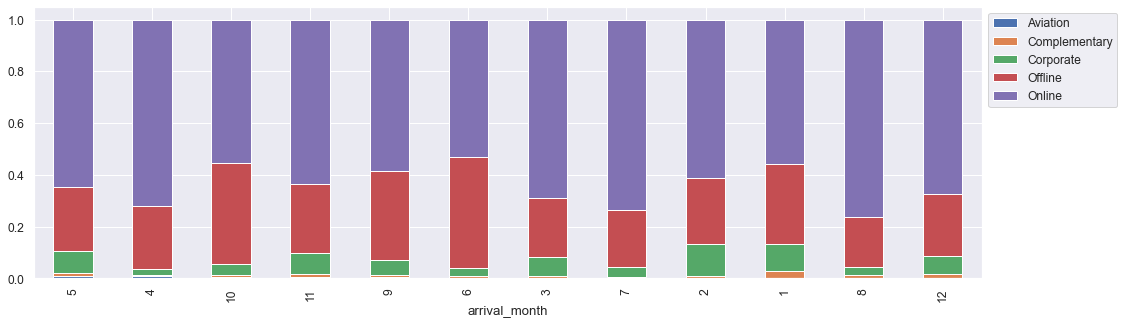

<IPython.core.display.Javascript object>

In [42]:
# arrival month vs market segment
stacked_barplot(data, "arrival_month", "market_segment_type")

**Observations:**

* There are some differences in month preferences between market segment categories:
    * Online segment's top months are july through october and december.
    * Offline segment's are june, september and october.
    * Corporate segment's are september through december, february and may.
    * Complementary segment is more spread out.
    * Finally, the Aviation segment is more active with bookings during april, may, and september through november.

## Data Preprocessing

- Missing value treatment: not needed

### Feature engineering:

In [43]:
# categorizing Meal Plans
meal_cat = ["Not Selected", "Meal Plan 1", "Meal Plan 2", "Meal Plan 3"]
df.type_of_meal_plan = pd.Categorical(
    df.type_of_meal_plan, ordered=True, categories=meal_cat
)

<IPython.core.display.Javascript object>

This categorization is just for aesthethical purposes (dropping the "Not Selected" category when one-hot-encoding the column).

### Outlier detection and treatment

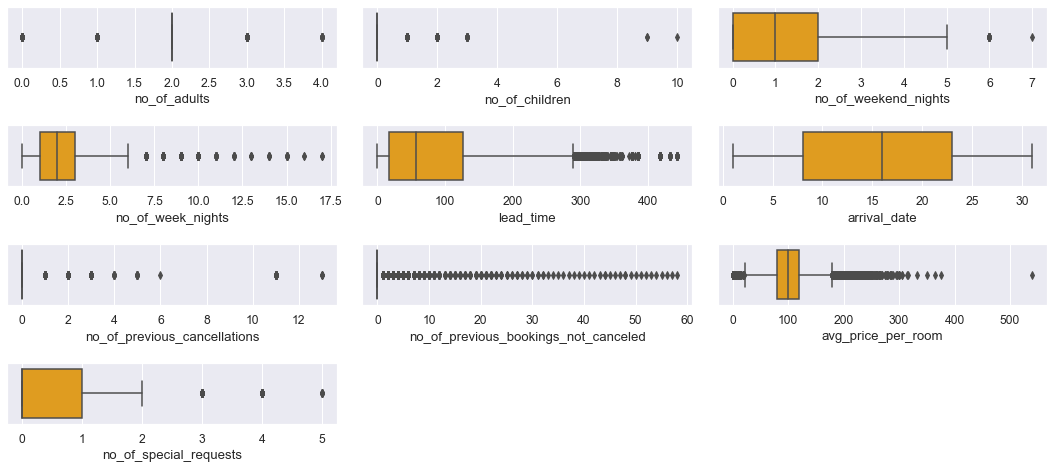

<IPython.core.display.Javascript object>

In [44]:
# outlier detection using boxplots
# num_cols = data1_imp.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 8))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x=variable, color="orange")
    plt.tight_layout(pad=2)

plt.show()

**Let's examine some values that look odd:**

* Reservations with no adults
* Reservations with 9 or 10 children
* Reservations with more than 5 weekend nights (needs at least 10 weekda noghts to accomplish that)
* Lead times over 400 days
* More than 10 previous cancellations
* Average Price per room over \$500

In [45]:
# Examining statistic summary of records with no adults
df[df["no_of_adults"] == 0]["no_of_children"].describe()

count   139.00000
mean      2.02878
std       0.20650
min       1.00000
25%       2.00000
50%       2.00000
75%       2.00000
max       3.00000
Name: no_of_children, dtype: float64

<IPython.core.display.Javascript object>

While this looks odd, it's not improbable. No action will be taken.

In [46]:
# 9 or 10 children looks weird, as we are talking about hotel rooms here, not entire bungalows.
df[df["no_of_children"] > 3]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
6338              2              10                     0                  2   
10041             1               9                     2                  1   
10061             2               9                     2                  5   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
6338        Meal Plan 1                           0        Room_Type 4   
10041       Meal Plan 1                           0        Room_Type 1   
10061       Meal Plan 1                           0        Room_Type 2   

       lead_time  arrival_year  arrival_month  arrival_date  \
6338          37          2018              1            12   
10041         11          2017             10            11   
10061          8          2017              8            13   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
6338               Online               0                             0   
10041           Corporate               0                             0   
10061              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
6338                                      0            84.45000   
10041                                     0            95.00000   
10061                                     0            76.50000   

       no_of_special_requests  booking_status  
6338                        1               0  
10041                       0               0  
10061                       1               1

<IPython.core.display.Javascript object>

**Some observations:**

* Just 3 records show reservations with 9 or 10 children.
* These reservations record only 1 or 2 adults. 9 children for just one family is not impossible, but very rare.
* Also hotel rooms usually don't have that much capacity.
* Conclusion: these values are probably typing mistakes. Even if they weren't, the logit regression will be impacted by these outliers.
* To avoid distorting the model, these few records will be dropped.

In [47]:
# checking high qty of days of weekend stays
df[df["no_of_weekend_nights"] > 5].groupby("no_of_weekend_nights")[
    "no_of_week_nights"
].describe()

count     mean     std      min      25%      50%  \
no_of_weekend_nights                                                        
6                    20.00000 14.30000 1.45458 12.00000 13.00000 14.00000   
7                     1.00000 17.00000     NaN 17.00000 17.00000 17.00000   

                          75%      max  
no_of_weekend_nights                    
6                    15.00000 17.00000  
7                    17.00000 17.00000

<IPython.core.display.Javascript object>

It can be seen that the minimum weekdays for these records are above the number that makes continuous stays with 6 and 7 weekend days possible (10 and 15 respectively). No treatment necessary.

In [48]:
# checking high number of lead times
df[df["lead_time"] > 400]["booking_status"].value_counts()

1    102
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

* There are 102 records with more than 400 days of lead time, and every one of these reservations was cancelled.
* While odd, there's consistency in these values, and they won't be treated.

In [49]:
df[df["no_of_previous_cancellations"] > 6].describe().T

count       mean      std        min  \
no_of_adults                         29.00000    1.82759  0.46820    1.00000   
no_of_children                       29.00000    0.00000  0.00000    0.00000   
no_of_weekend_nights                 29.00000    0.41379  0.62776    0.00000   
no_of_week_nights                    29.00000    1.44828  0.68589    0.00000   
required_car_parking_space           29.00000    0.10345  0.30993    0.00000   
lead_time                            29.00000   29.10345 65.56586    0.00000   
arrival_year                         29.00000 2018.00000  0.00000 2018.00000   
arrival_month                        29.00000    1.55172  1.05513    1.00000   
arrival_date                         29.00000   12.96552  4.76957    5.00000   
repeated_guest                       29.00000    1.00000  0.00000    1.00000   
no_of_previous_cancellations         29.00000   11.27586  0.70186   11.00000   
no_of_previous_bookings_not_canceled 29.00000    7.58621  7.75296    0.00000   
avg_price_per_room                   29.00000   80.92034 10.24192   67.22000   
no_of_special_requests               29.00000    0.62069  0.56149    0.00000   
booking_status                       29.00000    0.13793  0.35093    0.00000   

                                            25%        50%        75%  \
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       1.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               1.00000    3.00000    8.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           1.00000    1.00000    2.00000   
arrival_date                            9.00000   13.00000   15.00000   
repeated_guest                          1.00000    1.00000    1.00000   
no_of_previous_cancellations           11.00000   11.00000   11.00000   
no_of_previous_bookings_not_canceled    1.00000    4.00000   10.00000   
avg_price_per_room                     73.90000   79.00000   86.00000   
no_of_special_requests                  0.00000    1.00000    1.00000   
booking_status                          0.00000    0.00000    0.00000   

                                            max  
no_of_adults                            3.00000  
no_of_children                          0.00000  
no_of_weekend_nights                    2.00000  
no_of_week_nights                       3.00000  
required_car_parking_space              1.00000  
lead_time                             190.00000  
arrival_year                         2018.00000  
arrival_month                           4.00000  
arrival_date                           29.00000  
repeated_guest                          1.00000  
no_of_previous_cancellations           13.00000  
no_of_previous_bookings_not_canceled   22.00000  
avg_price_per_room                    108.00000  
no_of_special_requests                  2.00000  
booking_status                          1.00000

<IPython.core.display.Javascript object>

**Some observations:**

* These 29 records from just the first 4 months of the year 2018 show an anomalous behavior that could impact the regression model.
* Indeed, the EDA shows little or no relationship between this variable and the probability of cancellation.
* These few outliers will be dropped.

In [50]:
# Records with average price higher than 500 USD
df[df["avg_price_per_room"] > 500]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
33114             2               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
33114       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
33114         35          2018              3            25   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
33114             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0           540.00000   

       no_of_special_requests  booking_status  
33114                       0               1

<IPython.core.display.Javascript object>

**Some observations:**

* Just one record for a cancelled one-night weekday stay for 2 adults.
* Probably the result of a pricing error on a room that got inadvertently reserved (and then cancelled), or a typing mistake.
* The record will be dropped because it's not significative enough to add value, while as an outlier it has the potential to distort the regression.

In [51]:
# copying the df and dropping outlier rows
df2 = df.copy()

df2.drop(df[df["no_of_children"] > 3].index, inplace=True)

df2.drop(df2[df2["no_of_previous_cancellations"] > 6].index, inplace=True)

df2.drop(df2[df2["avg_price_per_room"] > 500].index, inplace=True)

df2.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [52]:
print(f"Total rows dropped: {df.shape[0] - df2.shape[0]}")

Total rows dropped: 33


<IPython.core.display.Javascript object>

The amount of dropped data is very conservative, almost insignificant (less than 0.1% of the data) given the size of the data set.

## EDA - Post Preprocessing

- It is a good idea to explore the data once again after manipulating it.
- After this second brief exploration, data will be prepared for the classification models.



Feature: no_of_adults


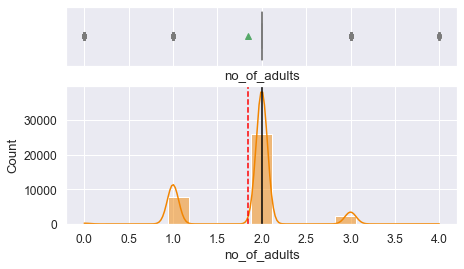



Feature: no_of_children


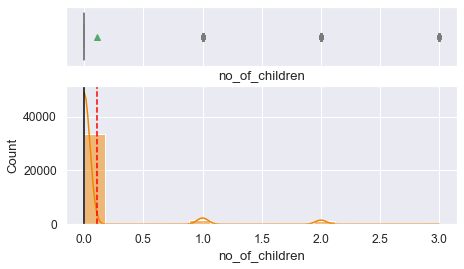



Feature: no_of_weekend_nights


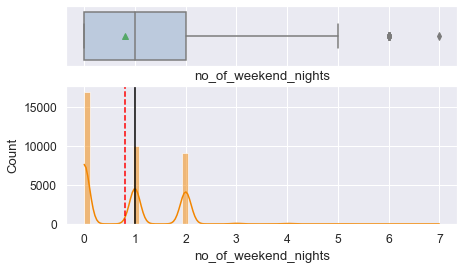



Feature: no_of_week_nights


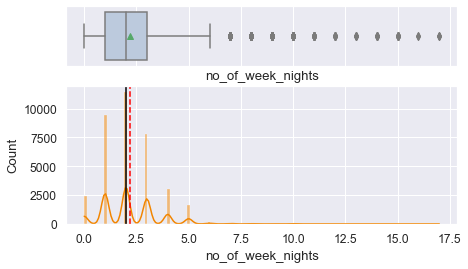



Feature: lead_time


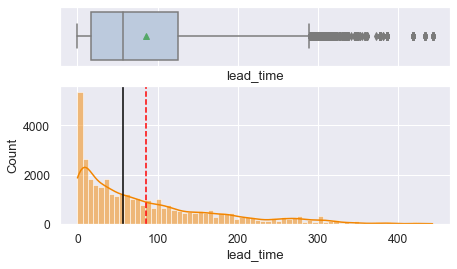



Feature: arrival_date


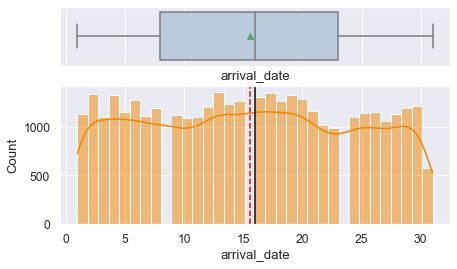



Feature: no_of_previous_cancellations


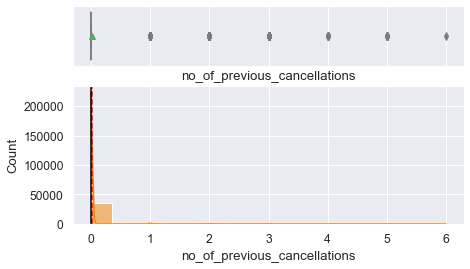



Feature: no_of_previous_bookings_not_canceled


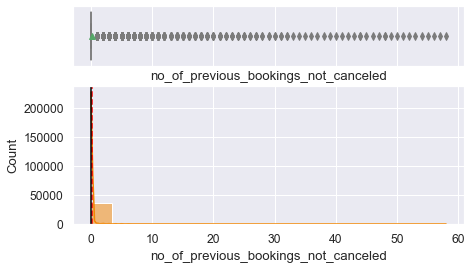



Feature: avg_price_per_room


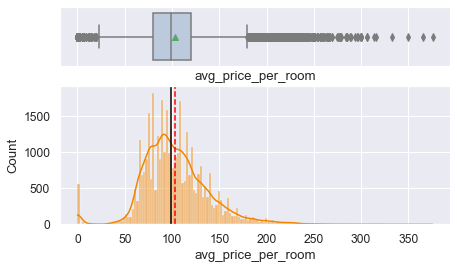



Feature: no_of_special_requests


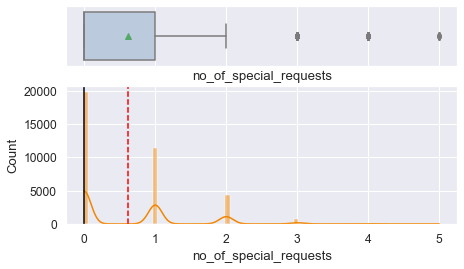

<IPython.core.display.Javascript object>

In [53]:
for cat in num_cols:
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    histogram_boxplot(df2, cat, figsize=(7, 4), kde=True)
    plt.show()

**Observations:**

* The cleaning of outliers for the columns **no_of_children**, **no_of_previous_cancellations** lets us have more "sane" values for those columns.
* Cleaning up the top outlier for **avg_price_per_room** is barely noticeable but could help reducing the distortion caused in the regression model by that value.



Feature: type_of_meal_plan


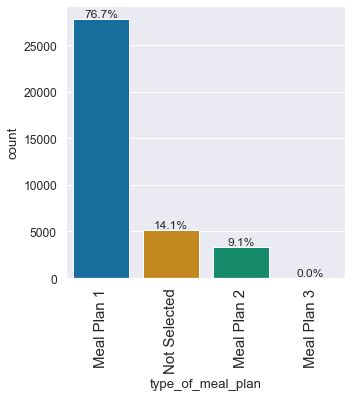



Feature: required_car_parking_space


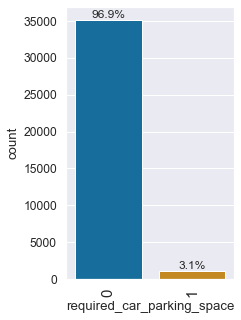



Feature: room_type_reserved


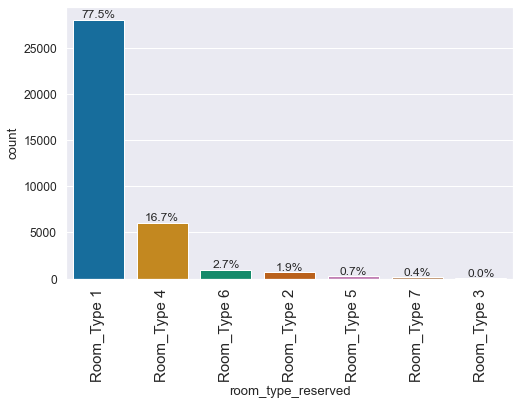



Feature: arrival_year


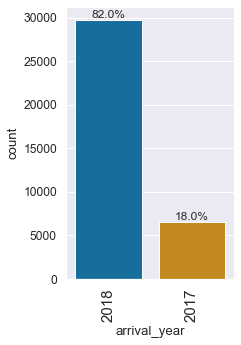



Feature: arrival_month


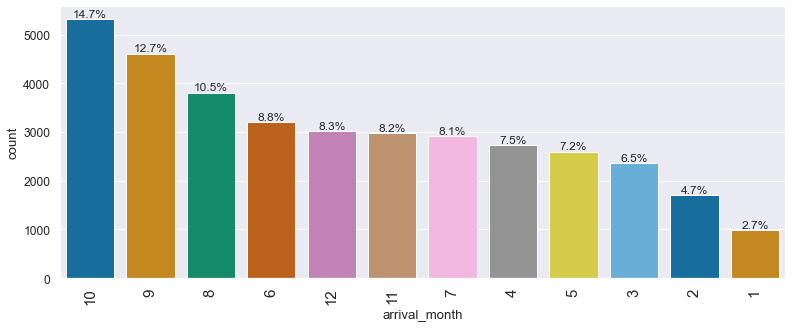



Feature: market_segment_type


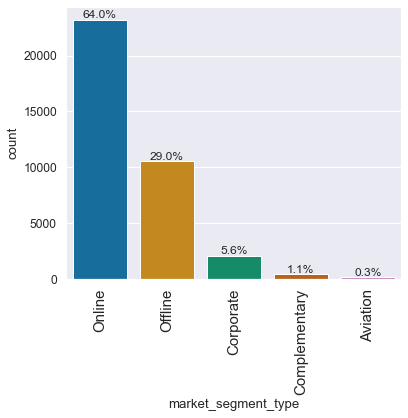



Feature: repeated_guest


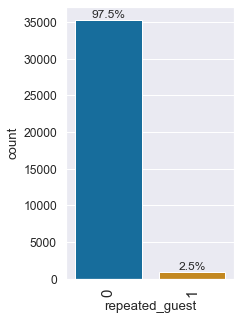



Feature: booking_status


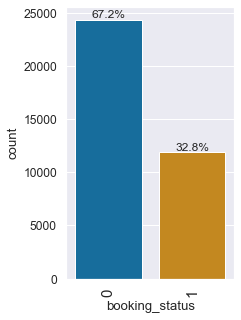

<IPython.core.display.Javascript object>

In [54]:
for cat in cat_cols:
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    labeled_barplot(df2, cat, size=5, perc=True)

The effect of the outlier cleaning had very little or no significance for the categorical variables.

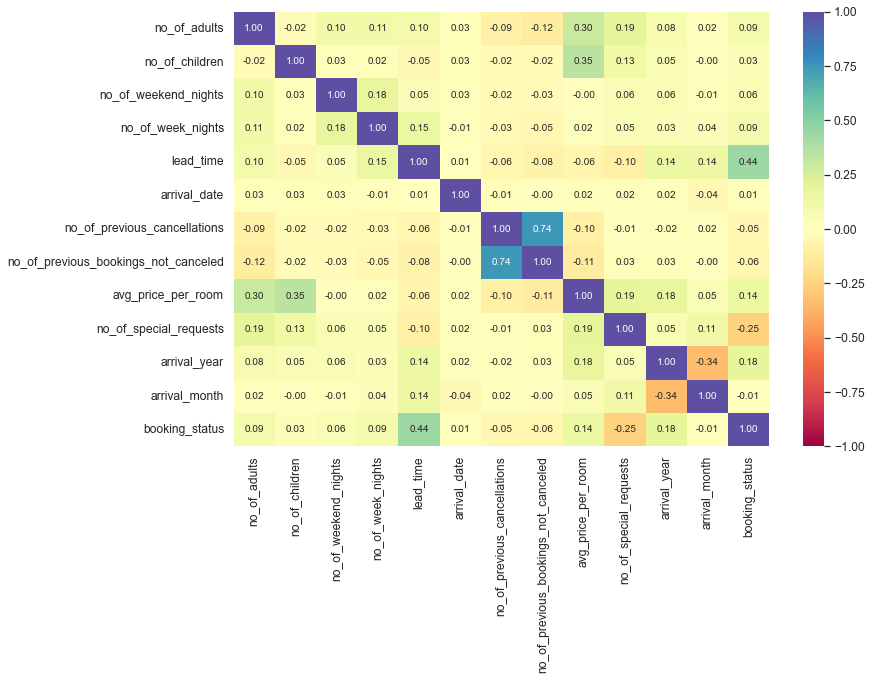

<IPython.core.display.Javascript object>

In [55]:
# Checking the correlations between numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(
    df2[num_cols_plus].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
# plt.xticks(rotation=45)
plt.show()

The effect of outlier cleaning on correlations is not noticeable. No further exploration is necessary given what was observed.

## Data Preparation for Modelling

The first model we will use for classification is the logistic regression (or just Logit). We will need to prepare and split the data the same way we do it for a linear regression model:
* Separate dependent vs independent variables
* Add the intersect or constant to the independent variables
* One-hot-encode categorical independent variables (the dependent categorical variable was already encoded)
* Split train and test sets.

In [56]:
# independent  and dependent variables
X = df2.drop(["booking_status"], axis=1)
y = df2["booking_status"]

# adding the constant
X = sm.add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

Let's check the size and composition of the training and testing sets:

In [57]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25369, 28)
Shape of test set :  (10873, 28)
Percentage of classes in training set:
0   0.67251
1   0.32749
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67157
1   0.32843
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

The class proportions are very similar between both sets, so no need to introduce an exogenous balancing criterium. As a reult, we have data sets ready for fitting a Logit regression model, but multicollinearity can (and so, must) be checked before model building (we could do a fit with the data as it is, but it would provide very little or not useful information).

## Checking Multicollinearity

In [58]:
# function to check VIF
def check_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif

<IPython.core.display.Javascript object>

In [59]:
check_vif(X_train)

feature            VIF
0                                  const 40001554.43810
1                           no_of_adults        1.34200
2                         no_of_children        2.10004
3                   no_of_weekend_nights        1.06804
4                      no_of_week_nights        1.09734
5             required_car_parking_space        1.03771
6                              lead_time        1.39067
7                           arrival_year        1.43082
8                          arrival_month        1.27318
9                           arrival_date        1.00759
10                        repeated_guest        1.73387
11          no_of_previous_cancellations        2.30551
12  no_of_previous_bookings_not_canceled        2.49281
13                    avg_price_per_room        2.03194
14                no_of_special_requests        1.25565
15         type_of_meal_plan_Meal Plan 1        1.88816
16         type_of_meal_plan_Meal Plan 2        2.16486
17         type_of_meal_plan_Meal Plan 3        1.02630
18        room_type_reserved_Room_Type 2        1.09589
19        room_type_reserved_Room_Type 3        1.00121
20        room_type_reserved_Room_Type 4        1.35767
21        room_type_reserved_Room_Type 5        1.03287
22        room_type_reserved_Room_Type 6        2.04545
23        room_type_reserved_Room_Type 7        1.12290
24     market_segment_type_Complementary        4.21729
25         market_segment_type_Corporate       16.21029
26           market_segment_type_Offline       61.01561
27            market_segment_type_Online       67.65625

<IPython.core.display.Javascript object>

Variable **no_of_previous_bookings_not_canceled** will be dropped, because it has a high VIF and also is heavily correlated with "no_of_previous_cancellations".

In [60]:
col_to_drop = ["no_of_previous_bookings_not_canceled"]
X_train_2 = X_train.drop(col_to_drop, axis=1)
X_test_2 = X_test.drop(col_to_drop, axis=1)

<IPython.core.display.Javascript object>

In [61]:
check_vif(X_train_2)

feature            VIF
0                               const 39847264.59199
1                        no_of_adults        1.34155
2                      no_of_children        2.09995
3                no_of_weekend_nights        1.06800
4                   no_of_week_nights        1.09733
5          required_car_parking_space        1.03734
6                           lead_time        1.39061
7                        arrival_year        1.42530
8                       arrival_month        1.27316
9                        arrival_date        1.00754
10                     repeated_guest        1.64208
11       no_of_previous_cancellations        1.30935
12                 avg_price_per_room        2.03093
13             no_of_special_requests        1.25045
14      type_of_meal_plan_Meal Plan 1        1.88816
15      type_of_meal_plan_Meal Plan 2        2.16423
16      type_of_meal_plan_Meal Plan 3        1.02629
17     room_type_reserved_Room_Type 2        1.09589
18     room_type_reserved_Room_Type 3        1.00121
19     room_type_reserved_Room_Type 4        1.35751
20     room_type_reserved_Room_Type 5        1.03221
21     room_type_reserved_Room_Type 6        2.04499
22     room_type_reserved_Room_Type 7        1.12238
23  market_segment_type_Complementary        4.21081
24      market_segment_type_Corporate       16.19005
25        market_segment_type_Offline       61.00258
26         market_segment_type_Online       67.64513

<IPython.core.display.Javascript object>

Variable **no_of_children** has a VIF over 2 and the highest value, so it will be the next column to be dropped.

In [62]:
col_to_drop = ["no_of_children"]
X_train_3 = X_train_2.drop(col_to_drop, axis=1)
X_test_3 = X_test_2.drop(col_to_drop, axis=1)

<IPython.core.display.Javascript object>

In [63]:
check_vif(X_train_3)

feature            VIF
0                               const 39833736.74433
1                        no_of_adults        1.31935
2                no_of_weekend_nights        1.06724
3                   no_of_week_nights        1.09694
4          required_car_parking_space        1.03732
5                           lead_time        1.39046
6                        arrival_year        1.42482
7                       arrival_month        1.27294
8                        arrival_date        1.00739
9                      repeated_guest        1.64179
10       no_of_previous_cancellations        1.30922
11                 avg_price_per_room        1.99223
12             no_of_special_requests        1.24151
13      type_of_meal_plan_Meal Plan 1        1.87957
14      type_of_meal_plan_Meal Plan 2        2.16229
15      type_of_meal_plan_Meal Plan 3        1.02588
16     room_type_reserved_Room_Type 2        1.03490
17     room_type_reserved_Room_Type 3        1.00120
18     room_type_reserved_Room_Type 4        1.34992
19     room_type_reserved_Room_Type 5        1.03193
20     room_type_reserved_Room_Type 6        1.27586
21     room_type_reserved_Room_Type 7        1.09172
22  market_segment_type_Complementary        4.20808
23      market_segment_type_Corporate       16.18952
24        market_segment_type_Offline       60.99047
25         market_segment_type_Online       67.61230

<IPython.core.display.Javascript object>

Since the VIF levels for the rest of the numerical variables are inside tolerable levels, no more variables will be dropped at this time. Now we can do an exploratory model building, which will give us useful information regarding significative predicting variables vs those who are not:

## Building a Logistic Regression model

In [64]:
# fitting and displaying a summary of a logistic regression model from independent variables
# with no significative multicollinearity issues

logit = sm.Logit(y_train, X_train_3.astype(float))
lg_3 = logit.fit(disp=False)

print(lg_3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25369
Model:                          Logit   Df Residuals:                    25343
Method:                           MLE   Df Model:                           25
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.3340
Time:                        21:44:28   Log-Likelihood:                -10685.
converged:                      False   LL-Null:                       -16043.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -963.5740    122.471     -7.868      0.000   -1203.612    -723.535
no_of_adults                          0.0550      0.038      1

<IPython.core.display.Javascript object>

From this exploratory regression, we can detect that some independent variables have a high p-value, which means those variables have no significance as predictors.

We will remove every non-significative independent variable with the help of an iterative function that will:

1. Fit a Logit regression model over the current iteration's independent variables.
2. Check the p-values and drop the variable with the highest one (if it's higher than the predetermined alpha).
3. Repeat until every remaining variable has a p-value lower than alpha.
4. Return a list with the final independent variables.

In [65]:
# function to select significative independent variables (generalized version made from existing lessons/MLS code)
def select_by_p(X, y, alpha=0.05):
    # setting an initial max p-value
    max_p_value = 1
    cols = X.columns.tolist()

    while len(cols) > 0:
        # defining the train set
        x_train_aux = X[cols]

        # fitting the model
        model = sm.Logit(y, x_train_aux.astype(float)).fit(disp=False)

        # getting the p-values and the maximum p-value
        p_values = model.pvalues
        max_p_value = max(p_values)

        # name of the variable with maximum p-value
        feature_with_p_max = p_values.idxmax()

        if max_p_value > alpha:
            cols.remove(feature_with_p_max)
        else:
            break

    return cols

<IPython.core.display.Javascript object>

In [66]:
keep = select_by_p(
    X_train_3, y_train
)  # execute function to "clean up" non significant independent variables

<IPython.core.display.Javascript object>

In [67]:
keep  # display kept columns after the elimination by p-value

['const',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'repeated_guest',
 'avg_price_per_room',
 'no_of_special_requests',
 'type_of_meal_plan_Meal Plan 1',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Corporate',
 'market_segment_type_Offline']

<IPython.core.display.Javascript object>

In [68]:
# new train and test sets will contain only the selected features
X_train_4 = X_train_3[keep]
X_test_4 = X_test_3[keep]

<IPython.core.display.Javascript object>

In [69]:
# fitting logistic regression model with significative independent variables
logit = sm.Logit(y_train, X_train_4.astype(float))
lg_4 = logit.fit(disp=False)

print(lg_4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25369
Model:                          Logit   Df Residuals:                    25351
Method:                           MLE   Df Model:                           17
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.3331
Time:                        21:44:29   Log-Likelihood:                -10699.
converged:                       True   LL-Null:                       -16043.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -964.8710    116.779     -8.262      0.000   -1193.754    -735.988
no_of_weekend_nights               0.1470      0.020      7.420      0.

<IPython.core.display.Javascript object>

As a result we get a simpler model with only significant variables. To make sense of the parameters, we will convert the coefficients to odds:

In [70]:
# converting coefficients to odds
odds = np.exp(lg_4.params)

# finding the percentage change
perc_change_odds = (np.exp(lg_4.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train_4.columns)

Odds  Change_odd%
const                          0.00000   -100.00000
no_of_weekend_nights           1.15833     15.83283
no_of_week_nights              1.03295      3.29506
required_car_parking_space     0.19237    -80.76308
lead_time                      1.01606      1.60649
arrival_year                   1.61107     61.10699
arrival_month                  0.95887     -4.11317
repeated_guest                 0.13408    -86.59151
avg_price_per_room             1.01928      1.92837
no_of_special_requests         0.22768    -77.23199
type_of_meal_plan_Meal Plan 1  0.83281    -16.71922
room_type_reserved_Room_Type 2 0.75527    -24.47329
room_type_reserved_Room_Type 4 0.82153    -17.84678
room_type_reserved_Room_Type 5 0.45177    -54.82297
room_type_reserved_Room_Type 6 0.51817    -48.18253
room_type_reserved_Room_Type 7 0.25125    -74.87465
market_segment_type_Corporate  0.40217    -59.78279
market_segment_type_Offline    0.16579    -83.42051

<IPython.core.display.Javascript object>

**Explanation of the effect of each variable on the cancelation probability:**

* **no_of_weekend_nights**: each additional weekend night increases the odds of cancelation of a booking by 15.83%.
* **no_of_week_nights**: each additional weekday night increases the odds of cancelation of a booking by 3.30%.
* **required_car_parking_space**: reservations with parking space are 80.76% less likely to be canceled.
* **lead_time**: For every day of lead time, the chance of cancelation increases by 1.6%.
* **arrival_year**: For this dataset, a booking from the year 2018 is 61.1% more likely to be canceled.
* **arrival_month**: Each subsequent month for a particular booking is 4.11% less likely to be canceled than for a previous month.
* **repeated_guest**: A repeated guest is 86.59% less likely to cancel their reservation.
* **avg_price_per_room**: A reservation's probability of being canceled increases 1.93% for each euro of the avg room price.
* **no_of_special_requests**: Each special request reduces the chance of cancelation by 77.23%
* **type_of_meal_plan_Meal Plan 1**: Selecting Meal Plan 1 reduces the probability of cancelation by 16.72%
* **room_type_reserved_Room_Type 2**: If the reservation has room type 2, the odds of cancelation are reduced by 24.47%
* **room_type_reserved_Room_Type 4**: If the reservation has room type 4, the odds of cancelation are reduced by 17.85%
* **room_type_reserved_Room_Type 5**: If the reservation has room type 5, the odds of cancelation are reduced by 54.82%
* **room_type_reserved_Room_Type 6**: If the reservation has room type 6, the odds of cancelation are reduced by 48.18%
* **room_type_reserved_Room_Type 7**: If the reservation has room type 7, the odds of cancelation are reduced by 74.87%
* **market_segment_type_Corporate**: If the market segment is "Corporate", the odds of cancelation are reduced by 59.78%
* **market_segment_type_Offline**: If the market segment is "Offline", the odds of cancelation are reduced by 83.42%

**Important note:** For academic purposes the arrival year was kept among the independent variables, but given the short lapse of time collected in the dataset, we cannot really infer a significative relationship between the year and the target variable and for business prediction purposes the variable should be removed. More data is needed to infer a tendency in the chance of cancelations along a period of time, *ceteris paribus*.

Next, the model performance will get tested.

## Model performance evaluation

Some functions for performance assessing and tracking will be defined:

In [71]:
# function to check performance metrics of train vs test sets
def model_performance_classification_statsmodels(
    label, model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Model": label,
            "Threshold": threshold,
            "Nodes": 0,  # saving space for decision trees to be included in the performance tracker later
            "Depth": 0,  # saving space for decision trees to be included in the performance tracker later
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [72]:
# function to plot a confusion matrix


def confusion_matrix_statsmodels(
    model, predictors, target, threshold=0.5, figsize=(6, 4)
):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="mako")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Model Evaluation at Default Threshold (50%)

#### Confusion Matrix, Training Set:

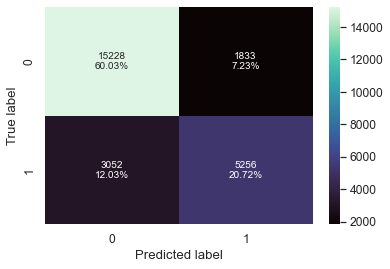

<IPython.core.display.Javascript object>

In [73]:
confusion_matrix_statsmodels(lg_4, X_train_4, y_train)

#### Confusion Matrix, Testing Set:

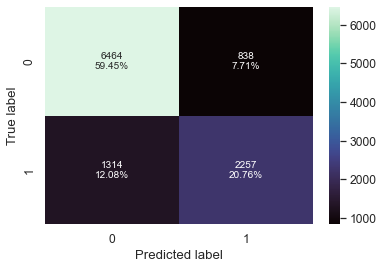

<IPython.core.display.Javascript object>

In [74]:
confusion_matrix_statsmodels(lg_4, X_test_4, y_test)

**Observations:**
* The confusion matrices for the training and testing sets look very similar.
* About 80% of predictions are accurate.
* The recall score might be a little low, around 60%.

#### Performance Metrics Tracker Update:

In [75]:
# We will add each iteration of classification models and their tuned versions to be able to compare them later.
# The tracker will contain model performance for both train and test sets
model_perf_tracker = model_performance_classification_statsmodels(
    "Logit v4 - train", lg_4, X_train_4, y_train
)
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_statsmodels(
            "Logit v4 - test", lg_4, X_test_4, y_test
        ),
    ],
    ignore_index=True,
)

<IPython.core.display.Javascript object>

In [76]:
model_perf_tracker

Model  Threshold  Nodes  Depth  Accuracy  Recall  Precision  \
0  Logit v4 - train    0.50000      0      0   0.80744 0.63264    0.74143   
1   Logit v4 - test    0.50000      0      0   0.80208 0.63204    0.72924   

       F1  
0 0.68273  
1 0.67717

<IPython.core.display.Javascript object>

The model looks good at this point. It doesn't seem to be overfitting, and the accuracy is high. But given that:
1. The cost of a low recall is a potential vacancy, which has a high cost, 
2. On the other side, special attention can be given to customers that are more likely to cancel their reservations, at some cost too, but less than the cost of a vacancy. That means false positives are also costly, but not as much.

We should tune the model's threshold to get better **recall scores** as a priority, while not neglecting **precision** in order to reduce the cost of false positives. That means targeting higher **F1 scores** to handle both metrics at the same time.

Consequently, we will try 2 methods for threashold tuning:
* ROC/AUC method, consisting on checking the model quality with the ROC curve and the Area under the curve, and then selecting a point where there's an optimum gain of true positives relative to false positives.
* Precision-Recall curve, where we plot recall and precision scores relative to threshold and select a point of balance between both metrics.

### Model Threshold Tuning (ROC curve - AOC):

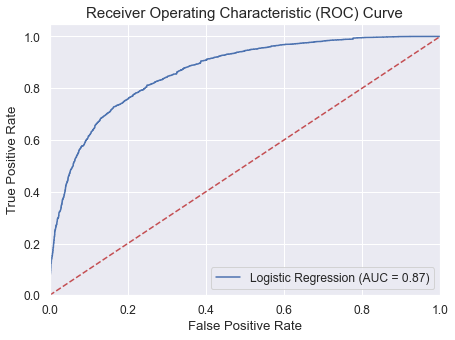

<IPython.core.display.Javascript object>

In [77]:
# ROC = Receiver Operating Characteristic curve
# AUC = Area under the curve (the higher the better)
logit_roc_auc_train = roc_auc_score(y_train, lg_4.predict(X_train_4))
fpr, tpr, thresholds = roc_curve(y_train, lg_4.predict(X_train_4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=15)
plt.legend(loc="lower right")
plt.show()

With an area under the curve (AUC) of 0.87, the model seems to be good at prediction.

Now we will use this curve to determine a new optimal threshold for better model performance:

In [78]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg_4.predict(X_train_4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(f"The optimal threshold as per ROC-AUC method is {optimal_threshold_auc_roc}")

The optimal threshold as per ROC-AUC method is 0.383746689877898


<IPython.core.display.Javascript object>

Next we will check the new performance, using the ROC-AUC optimal threshold:

#### Confusion Matrix, Training Set:

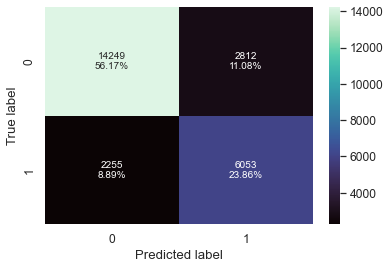

<IPython.core.display.Javascript object>

In [79]:
# creating confusion matrix - TRAIN
confusion_matrix_statsmodels(
    lg_4, X_train_4, y_train, threshold=optimal_threshold_auc_roc
)

#### Confusion Matrix, Testing Set:

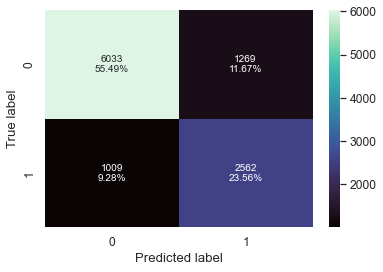

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix - TEST
confusion_matrix_statsmodels(
    lg_4, X_test_4, y_test, threshold=optimal_threshold_auc_roc
)

**Observations:**
* The confusion matrices for the training and testing sets look very similar.
* About 79-80% of predictions are accurate.
* The recall score increased significatively.

#### Performance Metrics Tracker Update:

In [81]:
# adding new model iterations to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_statsmodels(
            "Logit v4 ROC-AUC-optimal - train",
            lg_4,
            X_train_4,
            y_train,
            threshold=optimal_threshold_auc_roc,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_statsmodels(
            "Logit v4 ROC-AUC-optimal - test",
            lg_4,
            X_test_4,
            y_test,
            threshold=optimal_threshold_auc_roc,
        ),
    ],
    ignore_index=True,
)
model_perf_tracker

Model  Threshold  Nodes  Depth  Accuracy  \
0                  Logit v4 - train    0.50000      0      0   0.80744   
1                   Logit v4 - test    0.50000      0      0   0.80208   
2  Logit v4 ROC-AUC-optimal - train    0.38375      0      0   0.80027   
3   Logit v4 ROC-AUC-optimal - test    0.38375      0      0   0.79049   

   Recall  Precision      F1  
0 0.63264    0.74143 0.68273  
1 0.63204    0.72924 0.67717  
2 0.72857    0.68280 0.70494  
3 0.71745    0.66875 0.69225

<IPython.core.display.Javascript object>

**Observations:**
* Adjusting the threshold using the ROC-AUC method increased the recall for the test set in about 14%.
* Some Accuracy and Precision was sacrificed, also there's more difference between train and test sets.

Another method, the precision-recall curve will be tried to find out if performance can be furthr improved.

### Precision-Recall Curve

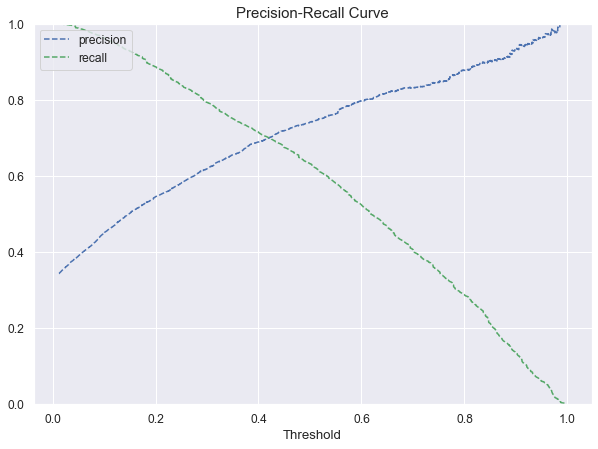

<IPython.core.display.Javascript object>

In [82]:
y_scores = lg_4.predict(X_train_4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.title("Precision-Recall Curve", fontsize=15)
plt.show()

In [83]:
# "eyeballing" the intersection point threshold (recall-precision balance)
prec_recall_thresh = 0.42

<IPython.core.display.Javascript object>

#### Confusion Matrix, Training Set:

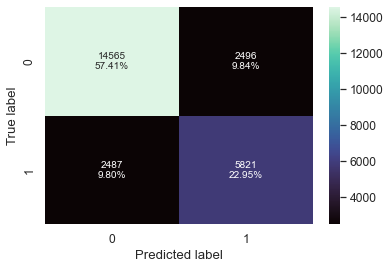

<IPython.core.display.Javascript object>

In [84]:
# creating confusion matrix - TRAIN
confusion_matrix_statsmodels(lg_4, X_train_4, y_train, threshold=prec_recall_thresh)

#### Confusion Matrix, Testing Set:

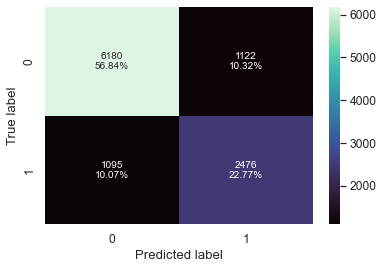

<IPython.core.display.Javascript object>

In [85]:
# creating confusion matrix - TEST
confusion_matrix_statsmodels(lg_4, X_test_4, y_test, threshold=prec_recall_thresh)

**Observations:**
* The confusion matrices for the training and testing sets still look very similar.
* About 80% of predictions are accurate.
* The recall score is lower than the one achieved using the ROC-AUC method.

#### Performance Metrics Tracker Update:

In [86]:
# adding new model iterations to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_statsmodels(
            "Logit v4 Precision-Recall Curve-optimal - train",
            lg_4,
            X_train_4,
            y_train,
            threshold=prec_recall_thresh,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_statsmodels(
            "Logit v4 Precision-Recall Curve-optimal - test",
            lg_4,
            X_test_4,
            y_test,
            threshold=prec_recall_thresh,
        ),
    ],
    ignore_index=True,
)
model_perf_tracker

Model  Threshold  Nodes  Depth  \
0                                 Logit v4 - train    0.50000      0      0   
1                                  Logit v4 - test    0.50000      0      0   
2                 Logit v4 ROC-AUC-optimal - train    0.38375      0      0   
3                  Logit v4 ROC-AUC-optimal - test    0.38375      0      0   
4  Logit v4 Precision-Recall Curve-optimal - train    0.42000      0      0   
5   Logit v4 Precision-Recall Curve-optimal - test    0.42000      0      0   

   Accuracy  Recall  Precision      F1  
0   0.80744 0.63264    0.74143 0.68273  
1   0.80208 0.63204    0.72924 0.67717  
2   0.80027 0.72857    0.68280 0.70494  
3   0.79049 0.71745    0.66875 0.69225  
4   0.80358 0.70065    0.69989 0.70027  
5   0.79610 0.69336    0.68816 0.69075

<IPython.core.display.Javascript object>

**Observations:**
* Adjusting the threshold using the precision-recall curve method reduced the recall for the test set a little (about 3-4%), compared with the score achieved using the ROC-AUC method.
* Accuracy and Precision were improved but the F1 score did worse
* On the other side, there's less difference between train and test sets (overfitting was reduced).

## Logit Model Selection

When comparing two models with very similar performance levels, the less overfitting one tends to predict better in the real world. The differences in performance between train and test sets are often dwarfed by the errors the models get when predicting over new unknown data.
*Note: This experience was gained during the last hackathon*

In conclusion, among the former threshold levels tried, the best suited for business predictions would be the **ROC-AUC optimal**.

In the next section, Decision Tree models for classification will be tried to verify which method is best suited for this particular dataset and the corresponding business solution asked for.

## Building a Decision Tree model

In this section, we will build and evaluate a CART Decision Tree Classification Model. At the end of this section, we will have a collection of models and their relevant performance scores, with the objective of being able to select, for this specific dataset and business needs, which one is the most apt to help the hotel chain best manage the issue of booking cancellations.

Outlier cleaning is not as needed with a CART model. The **df** dataset, which has some feature tweaking but not outlier cleaning, will be used.

In [87]:
# independent and dependent variables
X = df.drop(["booking_status"], axis=1)
y = df["booking_status"]

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [88]:
# "base" or "exploration" version of the CART model with no restrictions
# warning: extreme overfitting and unrealistic performance expected.
CART_0 = DecisionTreeClassifier(random_state=1)
CART_0.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

Once fitted, let's check the exploratory CART model performance. For Decision Trees, different performance functions will be defined and used.

### Checking Performance Metrics

In [89]:
# Performance metrics function for (in this case) decision trees.
# Notice it's different from the one used to assess logit regression performance in classification
def model_performance_classification_sklearn(label, model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Model": label,
            "Threshold": 0,  # matching columns to concatenate with previous performance reports
            "Nodes": model.tree_.node_count,
            "Depth": model.tree_.max_depth,
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [90]:
# Confusion matrix for the decision tree models. Different from the logistic regression one.
def confusion_matrix_sklearn(model, predictors, target, figsize=(6, 4)):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="mako")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Confusion Matrix, Training Set:

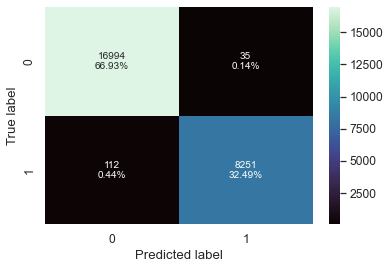

<IPython.core.display.Javascript object>

In [91]:
confusion_matrix_sklearn(CART_0, X_train_tree, y_train_tree)

#### Confusion Matrix, Testing Set:

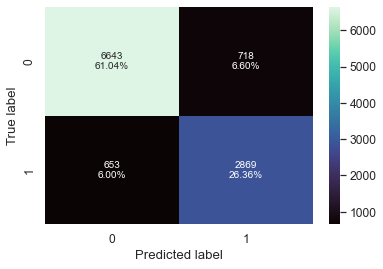

<IPython.core.display.Javascript object>

In [92]:
confusion_matrix_sklearn(CART_0, X_test_tree, y_test_tree)

**Observations:**
* Huge differences between training and testing set performances.
* Almost absurdly high scores on training set.
* This was expected.

#### Performance Metrics Tracker Update:

In [93]:
# adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "CART v0 - train", CART_0, X_train_tree, y_train_tree,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "CART v0 - test", CART_0, X_test_tree, y_test_tree,
        ),
    ],
    ignore_index=True,
)
model_perf_tracker

Model  Threshold  Nodes  Depth  \
0                                 Logit v4 - train    0.50000      0      0   
1                                  Logit v4 - test    0.50000      0      0   
2                 Logit v4 ROC-AUC-optimal - train    0.38375      0      0   
3                  Logit v4 ROC-AUC-optimal - test    0.38375      0      0   
4  Logit v4 Precision-Recall Curve-optimal - train    0.42000      0      0   
5   Logit v4 Precision-Recall Curve-optimal - test    0.42000      0      0   
6                                  CART v0 - train    0.00000   5913     37   
7                                   CART v0 - test    0.00000   5913     37   

   Accuracy  Recall  Precision      F1  
0   0.80744 0.63264    0.74143 0.68273  
1   0.80208 0.63204    0.72924 0.67717  
2   0.80027 0.72857    0.68280 0.70494  
3   0.79049 0.71745    0.66875 0.69225  
4   0.80358 0.70065    0.69989 0.70027  
5   0.79610 0.69336    0.68816 0.69075  
6   0.99421 0.98661    0.99578 0.99117  
7   0.87402 0.81459    0.79983 0.80715

<IPython.core.display.Javascript object>

**Observation:**

If we compare the model performance against the logistic regression ones, it looks clearly better in terms of every performance score. But this is due to the model being clearly overfitted, as expected from a decision tree model with no restrictions to its complexity. This can be checked looking at the model's performance using the testing set.
The quantity of nodes and the great depth of the model belies its excessive complexity.

#### Decision Tree Diagram:

Let's visualize -for academic purposes- the decision tree model with no tuning or restrictions:

In [94]:
# Function to display the tree diagram. This will be used more than once.
def tree_diagram(model, X, figsize=(20, 10)):
    plt.figure(figsize=figsize)
    out = tree.plot_tree(
        model,
        feature_names=X.columns.tolist(),
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # Add arrows to the decision tree if needed
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

<IPython.core.display.Javascript object>

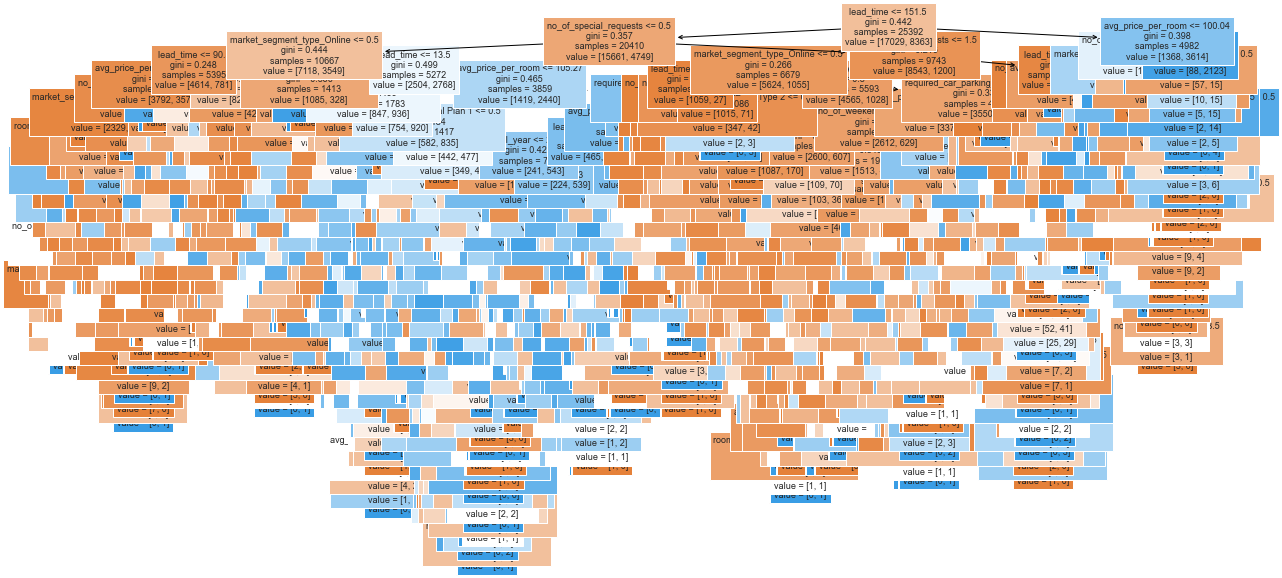

<IPython.core.display.Javascript object>

In [95]:
tree_diagram(CART_0, X_train_tree)

This figure is shown just to illustrate the grade of absurd complexity a decision tree can grow to, without proper tuning. This explotaroty model will not be used for business reccomendation purposes.

#### Checking Feature Importance:

Relative feature importance will be displayed for this tree, as it could give out interesting insights.

In [96]:
feature_names = X_train_tree.columns.tolist()  # for general use

<IPython.core.display.Javascript object>

In [97]:
# feature importance comparator display
def feat_importance(estimator, X, figsize=(8, 12)):
    importances = estimator.feature_importances_
    indices = np.argsort(importances)
    feature_names = X.columns.tolist()

    plt.figure(figsize=figsize)
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

<IPython.core.display.Javascript object>

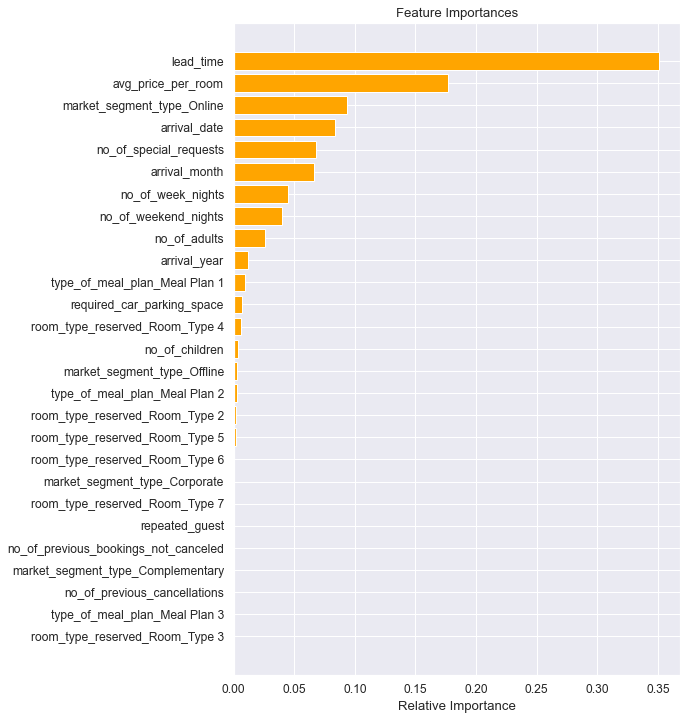

<IPython.core.display.Javascript object>

In [98]:
feat_importance(CART_0, X_train_tree)

**Observations:**

* **lead_time** seems to be the most important feature, which is consistent with the EDA observations.
* Other features listed on top are coherent with previous observations too.
* On the other side, the importance of **arrival_date** looks like "noise" captured by the model.

## Decision Tree Model Tuning (Pruning)

As said before, a, un-tuned decision tree model is bound to overfit and capture every noise in the dataset. For a model of this type to have any predictive usefulness, it needs to be tuned by pruning, simplifying it so that it captures less noise and serves a more general application. There are two ways to do this:
* Pre-Pruning: bounding some hyperparamenters (like maximum depth) before fitting the model, to limit its growth. The optimal hyperparameters will be determined with the help of the function GridSearchCV.
* Post-Pruning: cutting "branches" of the tree after fitting it, evaluating the benefits in performance for each possible branch to prune. To do this the cost-complexity pruning technique is used.

### Pre-Pruning approach to decision tree model tuning:

In [99]:
# Classifier setup
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from - used the example set presented during the MLS as a reasonable default
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Scoring setup (F1 score, given that the target classes are not very unbalanced)
acc_scorer = make_scorer(f1_score)

# Grid Search with cross validation execution (5 subsets as standard)
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_tree, y_train_tree)

# Parameter selection for the classifier (best from the GridSearchCV run)
estimator = grid_obj.best_estimator_

# Data fitting
estimator.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

#### Confusion Matrix, Training Set:

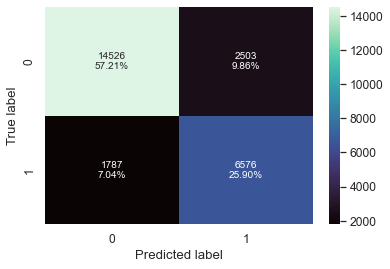

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn(estimator, X_train_tree, y_train_tree)

#### Confusion Matrix, Testing Set:

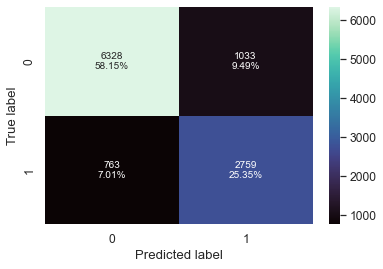

<IPython.core.display.Javascript object>

In [101]:
confusion_matrix_sklearn(estimator, X_test_tree, y_test_tree)

**Observations:**
* The differences between training and testing sets seem to have been resolved.
* Compared to the best Logit model, every performance score improved significatively.

#### Performance Metrics Tracker Update:

In [102]:
# adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "CART + GridSearchCV PrePruning - train",
            estimator,
            X_train_tree,
            y_train_tree,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "CART + GridSearchCV PrePruning - test",
            estimator,
            X_test_tree,
            y_test_tree,
        ),
    ],
    ignore_index=True,
)
model_perf_tracker

Model  Threshold  Nodes  Depth  \
0                                 Logit v4 - train    0.50000      0      0   
1                                  Logit v4 - test    0.50000      0      0   
2                 Logit v4 ROC-AUC-optimal - train    0.38375      0      0   
3                  Logit v4 ROC-AUC-optimal - test    0.38375      0      0   
4  Logit v4 Precision-Recall Curve-optimal - train    0.42000      0      0   
5   Logit v4 Precision-Recall Curve-optimal - test    0.42000      0      0   
6                                  CART v0 - train    0.00000   5913     37   
7                                   CART v0 - test    0.00000   5913     37   
8           CART + GridSearchCV PrePruning - train    0.00000     99      6   
9            CART + GridSearchCV PrePruning - test    0.00000     99      6   

   Accuracy  Recall  Precision      F1  
0   0.80744 0.63264    0.74143 0.68273  
1   0.80208 0.63204    0.72924 0.67717  
2   0.80027 0.72857    0.68280 0.70494  
3   0.79049 0.71745    0.66875 0.69225  
4   0.80358 0.70065    0.69989 0.70027  
5   0.79610 0.69336    0.68816 0.69075  
6   0.99421 0.98661    0.99578 0.99117  
7   0.87402 0.81459    0.79983 0.80715  
8   0.83105 0.78632    0.72431 0.75404  
9   0.83497 0.78336    0.72758 0.75444

<IPython.core.display.Javascript object>

**Observations:**
* The Pre-Pruning *apparently* reduced the model's performance (for the training set), but the former performance was just an illusion.
* The important comparison must be done against the Logit model across different thresholds: the tuned decision tree is clearly superior, at least for this business problem.
* For the test sets, the F1-score and recall are 9% higher than for the best version of the Logit model, while the precision score is almost the same as the best that could be achieved using the Logit regression.
* Accuracy is 4% higher than the best that could be achieved using the Logit regression.
* The complexity was notoriously reduced to just 99 nodes and a depth of 6.

#### Decision Tree Diagram:

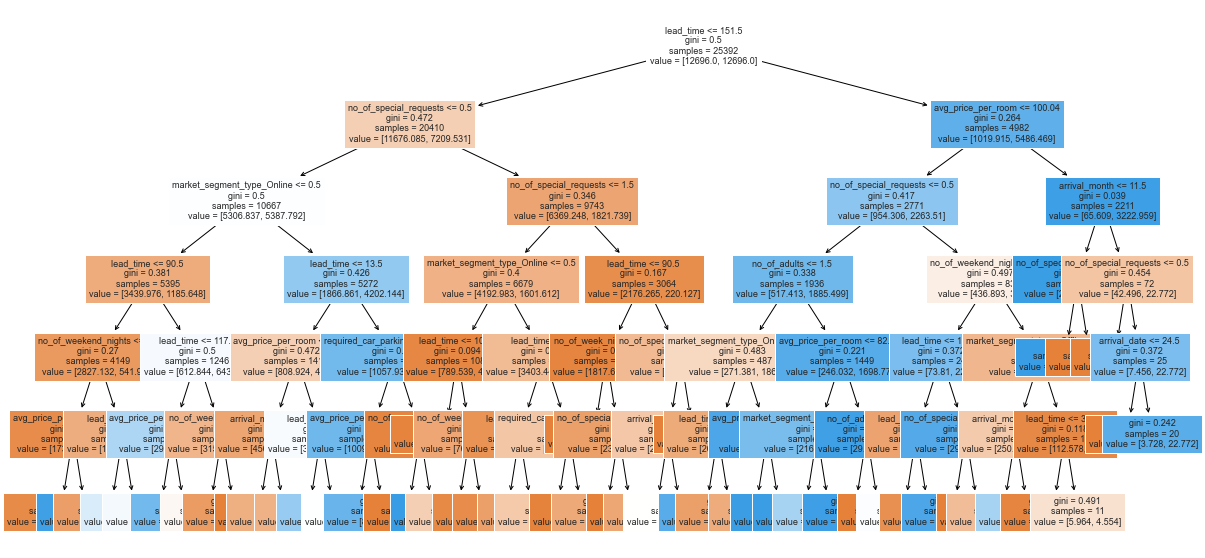

<IPython.core.display.Javascript object>

In [103]:
tree_diagram(estimator, X_train_tree)

This decision tree looks very simple while being powerful enough for prediction purposes. It could even be explained to the customer (hotel chain marketing team) in a short meeting. Still, the lack of space in this notebook makes it more convenient to display it in a simpler format:

In [104]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

**Observations:**
* This visualization is more readable and could be explained to the client if they wish to understand the minutiae of what's happening "under the hood".
* The first split used **lead_time** (either <= 151.5 or > 151.5 days) which is consistent with it being the most important feature.
* Other higher-node splits use features like **no_of_special_requests**, **avg_price_per_room** and **market_segment_type_Online**, among others.
* The importance of these features can be checked in the next visualization.

#### Checking Feature Importance:

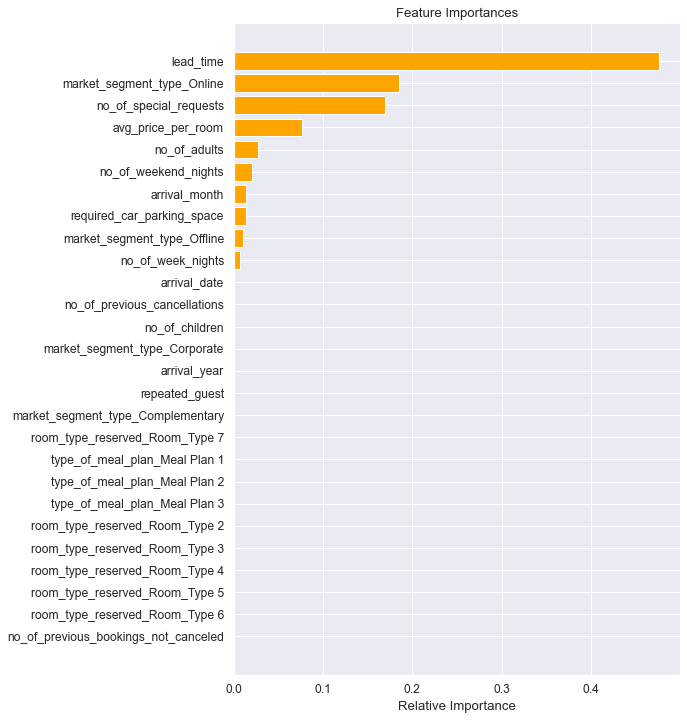

<IPython.core.display.Javascript object>

In [105]:
feat_importance(estimator, X_train_tree)

**Observations:**
* This visualization confirms the relative importance of **lead_time**, **market_segment_type_Online**, **no_of_special_requests**, and **avg_price_per_room** observed in the decision tree text-version diagram.

### Post-Pruning approach to decision tree model tuning:

Let's try now the post-pruning approach to CART model tuning:

In [106]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train_tree, y_train_tree)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [107]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1821     0.00890     0.32806
1822     0.00980     0.33786
1823     0.01272     0.35058
1824     0.03412     0.41882
1825     0.08118     0.50000

[1826 rows x 2 columns]

<IPython.core.display.Javascript object>

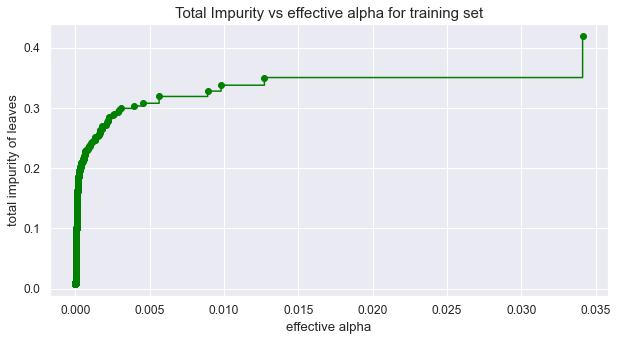

<IPython.core.display.Javascript object>

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(
    ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post", color="green"
)
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set", fontsize=15)
plt.show()

This plot confirms what we know about Alpha: less complexity means higher alpha and more impurity. The following code fits a series of CART models with growing alphas, meaning going from the most complex tree to the least complex one:

In [109]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train_tree, y_train_tree)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136938


<IPython.core.display.Javascript object>

The next code lets us visualize the relationship between depth and nodes of the fitted models and the corresponding alphas:

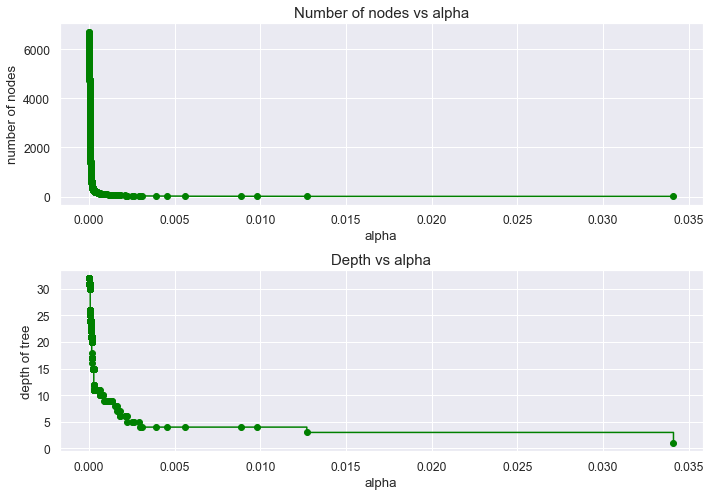

<IPython.core.display.Javascript object>

In [110]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post", color="green")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha", fontsize=15)
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post", color="green")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha", fontsize=15)
fig.tight_layout()

Next, F1 scores for each model fitted will be registered for the following optimization, for both training and testing sets:

In [111]:
f1_train = (
    []
)  # MLS case code, modified
for clf in clfs:
    pred_train = clf.predict(X_train_tree)
    values_train = f1_score(y_train_tree, pred_train)
    f1_train.append(values_train)

<IPython.core.display.Javascript object>

In [112]:
f1_test = []  # same as above
for clf in clfs:
    pred_test = clf.predict(X_test_tree)
    values_test = f1_score(y_test_tree, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

In [113]:
train_scores = [clf.score(X_train_tree, y_train_tree) for clf in clfs]
test_scores = [clf.score(X_test_tree, y_test_tree) for clf in clfs]

<IPython.core.display.Javascript object>

Next, the F1 scores are plotted to help visualize the optimization problem:

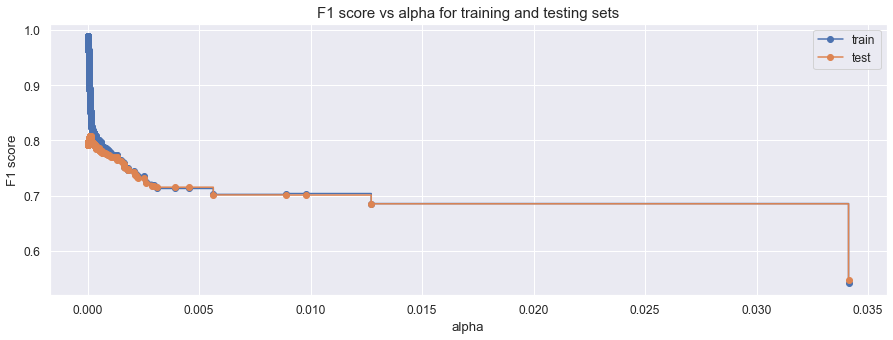

<IPython.core.display.Javascript object>

In [114]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 score vs alpha for training and testing sets", fontsize=15)
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
# ax.set_ylim([0.65, 1])
# ax.set_xlim([-0.0001, 0.001])
plt.show()

In [115]:
# creating the model where we get highest test F1 score
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167034,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

#### Confusion Matrix, Training Set:

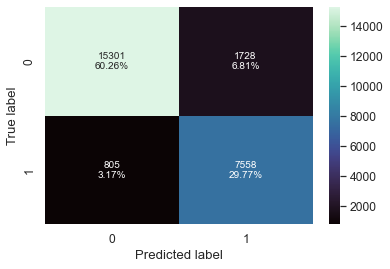

<IPython.core.display.Javascript object>

In [116]:
confusion_matrix_sklearn(best_model, X_train_tree, y_train_tree)

#### Confusion Matrix, Testing Set:

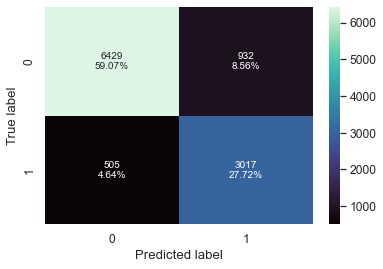

<IPython.core.display.Javascript object>

In [117]:
confusion_matrix_sklearn(best_model, X_test_tree, y_test_tree)

**Observations:**
* There are noticeable differences between training and testing sets compared to the Pre-Pruned model.
* Still, performance looks way better than any of the Logit regression scores.

#### Performance Metrics Tracker Update:

In [118]:
# adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "CART + ccp-Alpha PostPruning - train",
            best_model,
            X_train_tree,
            y_train_tree,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "CART + ccp-Alpha PostPruning - test", best_model, X_test_tree, y_test_tree,
        ),
    ],
    ignore_index=True,
)
model_perf_tracker

Model  Threshold  Nodes  Depth  \
0                                  Logit v4 - train    0.50000      0      0   
1                                   Logit v4 - test    0.50000      0      0   
2                  Logit v4 ROC-AUC-optimal - train    0.38375      0      0   
3                   Logit v4 ROC-AUC-optimal - test    0.38375      0      0   
4   Logit v4 Precision-Recall Curve-optimal - train    0.42000      0      0   
5    Logit v4 Precision-Recall Curve-optimal - test    0.42000      0      0   
6                                   CART v0 - train    0.00000   5913     37   
7                                    CART v0 - test    0.00000   5913     37   
8            CART + GridSearchCV PrePruning - train    0.00000     99      6   
9             CART + GridSearchCV PrePruning - test    0.00000     99      6   
10             CART + ccp-Alpha PostPruning - train    0.00000    813     22   
11              CART + ccp-Alpha PostPruning - test    0.00000    813     22   

    Accuracy  Recall  Precision      F1  
0    0.80744 0.63264    0.74143 0.68273  
1    0.80208 0.63204    0.72924 0.67717  
2    0.80027 0.72857    0.68280 0.70494  
3    0.79049 0.71745    0.66875 0.69225  
4    0.80358 0.70065    0.69989 0.70027  
5    0.79610 0.69336    0.68816 0.69075  
6    0.99421 0.98661    0.99578 0.99117  
7    0.87402 0.81459    0.79983 0.80715  
8    0.83105 0.78632    0.72431 0.75404  
9    0.83497 0.78336    0.72758 0.75444  
10   0.90024 0.90374    0.81391 0.85648  
11   0.86796 0.85662    0.76399 0.80766

<IPython.core.display.Javascript object>

**Observations:**
* Accuracy increased by 4%, recall by 9%, precision by 5% and F1-score by 7% from the Pre-Pruned model.
* On the other side, this model shows higher differences between the training and testing sets.
* From the "zoomed" F1 vs Alpha plot we can conclude that there's a point where the score for the testing set doesn't improve dramatically, while as the model becomes more complex, training set performance grows exponentially.
* The next model iteration will try to arrive at a compromise solution.

#### Decision Tree Diagram:

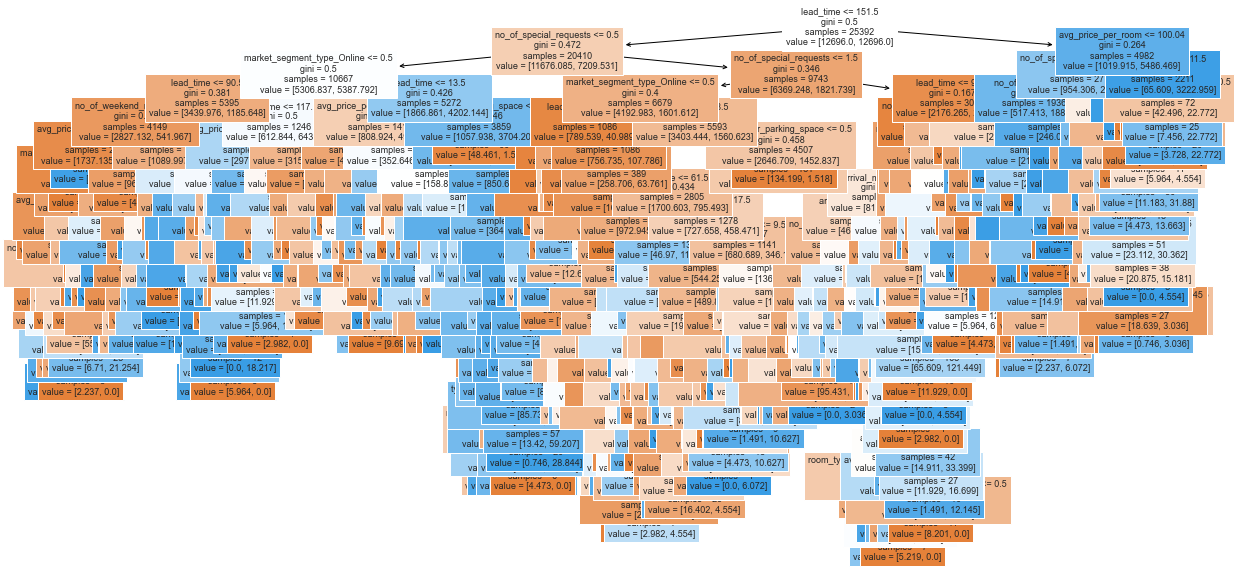

<IPython.core.display.Javascript object>

In [119]:
tree_diagram(best_model, X_train_tree)

The Post-Pruned model looks very complex. To be able to describe it, we need the text-only version:

In [120]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

While the tree is more complex than the Pre-Pruned one, the most important features don't seem to change.

#### Checking Feature Importance:

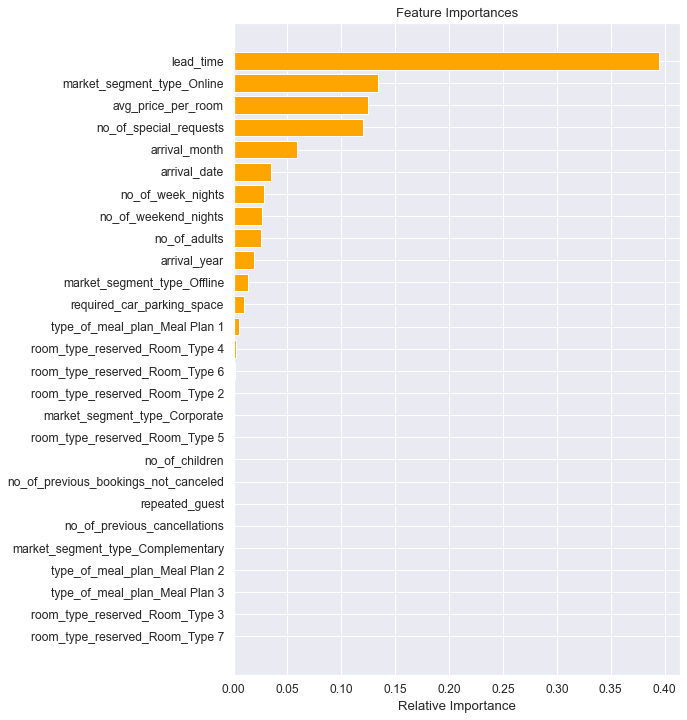

<IPython.core.display.Javascript object>

In [121]:
feat_importance(best_model, X_train_tree)

**Observations:**
* The relative importance of **lead_time**, **market_segment_type_Online**, **no_of_special_requests**, and **avg_price_per_room** observed in previous iterations remain unchanged.

### Adjusted Post-Pruning Model Tuning:

As a last iteration, we will try to arrive at a compromise solution between achieving an optimal F1 scoring and reducing overfitting:

Zooming in the "most complex" part to eyeball what's happening where the F1 scores for the train and test sets seem to diverge:

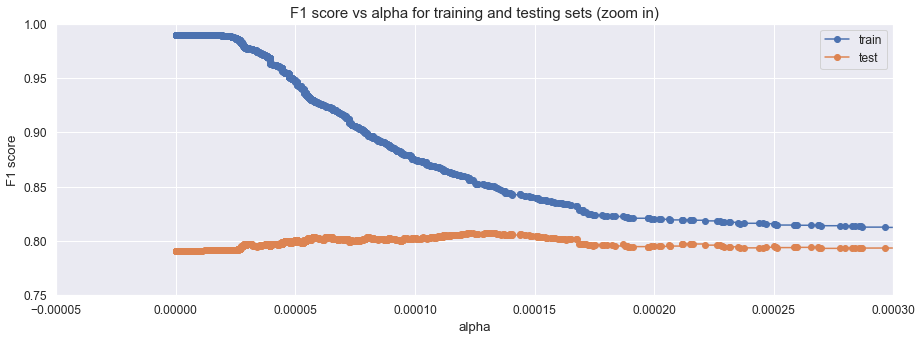

<IPython.core.display.Javascript object>

In [122]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 score vs alpha for training and testing sets (zoom in)", fontsize=15)
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
ax.set_ylim([0.75, 1])
ax.set_xlim([-0.00005, 0.0003])
plt.show()

In [123]:
# creating a better, simpler model based on argmax subject to restriction (ccp_alpha > 0.0002)...
# ...where train and test scores are less divergent (less overfitting)

# set up a working dataframe
optimize_df = pd.DataFrame(
    {"ccp_alpha": ccp_alphas, "f1_train": f1_train, "f1_test": f1_test}
)

# set restriction for ccp_alpha
optimize_df_restrict = optimize_df[optimize_df["ccp_alpha"] > 0.0002].reset_index(
    drop=True
)

# find optimal ccp_alpha for the model, subject to the restriction above
index_best_model_2 = np.argmax(optimize_df_restrict["f1_test"])
optimized_ccp_alpha = optimize_df_restrict.loc[index_best_model_2, "ccp_alpha"]

# build and fit model using the optimal ccp_alpha
best_model_2 = DecisionTreeClassifier(
    ccp_alpha=optimized_ccp_alpha, class_weight="balanced", random_state=1
).fit(X_train_tree, y_train_tree)

print(best_model_2)

DecisionTreeClassifier(ccp_alpha=0.00021155507334471722,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

#### Confusion Matrix, Training Set:

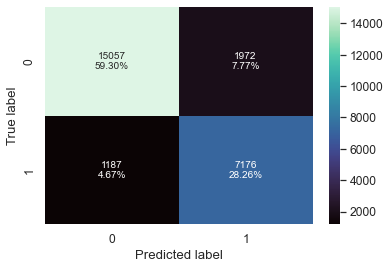

<IPython.core.display.Javascript object>

In [124]:
confusion_matrix_sklearn(best_model_2, X_train_tree, y_train_tree)

#### Confusion Matrix, Testing Set:

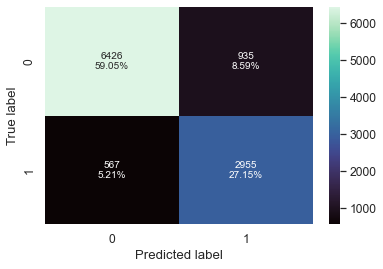

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(best_model_2, X_test_tree, y_test_tree)

**Observations:**
* Model still looks good, while reducing the difference between training and testing sets.

#### Performance Metrics Tracker Update:

In [126]:
# adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "CART + Adjusted PostPruning - train",
            best_model_2,
            X_train_tree,
            y_train_tree,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "CART + Adjusted PostPruning - test",
            best_model_2,
            X_test_tree,
            y_test_tree,
        ),
    ],
    ignore_index=True,
)
model_perf_tracker

Model  Threshold  Nodes  Depth  \
0                                  Logit v4 - train    0.50000      0      0   
1                                   Logit v4 - test    0.50000      0      0   
2                  Logit v4 ROC-AUC-optimal - train    0.38375      0      0   
3                   Logit v4 ROC-AUC-optimal - test    0.38375      0      0   
4   Logit v4 Precision-Recall Curve-optimal - train    0.42000      0      0   
5    Logit v4 Precision-Recall Curve-optimal - test    0.42000      0      0   
6                                   CART v0 - train    0.00000   5913     37   
7                                    CART v0 - test    0.00000   5913     37   
8            CART + GridSearchCV PrePruning - train    0.00000     99      6   
9             CART + GridSearchCV PrePruning - test    0.00000     99      6   
10             CART + ccp-Alpha PostPruning - train    0.00000    813     22   
11              CART + ccp-Alpha PostPruning - test    0.00000    813     22   
12              CART + Adjusted PostPruning - train    0.00000    347     15   
13               CART + Adjusted PostPruning - test    0.00000    347     15   

    Accuracy  Recall  Precision      F1  
0    0.80744 0.63264    0.74143 0.68273  
1    0.80208 0.63204    0.72924 0.67717  
2    0.80027 0.72857    0.68280 0.70494  
3    0.79049 0.71745    0.66875 0.69225  
4    0.80358 0.70065    0.69989 0.70027  
5    0.79610 0.69336    0.68816 0.69075  
6    0.99421 0.98661    0.99578 0.99117  
7    0.87402 0.81459    0.79983 0.80715  
8    0.83105 0.78632    0.72431 0.75404  
9    0.83497 0.78336    0.72758 0.75444  
10   0.90024 0.90374    0.81391 0.85648  
11   0.86796 0.85662    0.76399 0.80766  
12   0.87559 0.85807    0.78443 0.81960  
13   0.86199 0.83901    0.75964 0.79736

<IPython.core.display.Javascript object>

**Observations:**
* The adjustment made to the ccp-Alpha selection reduced overall performance, but improved overfitting.
* F1-score for the testing set was reduced by less than 2%.
* On the other side, overfitting was greatly reduced.

#### Decision Tree Diagram:

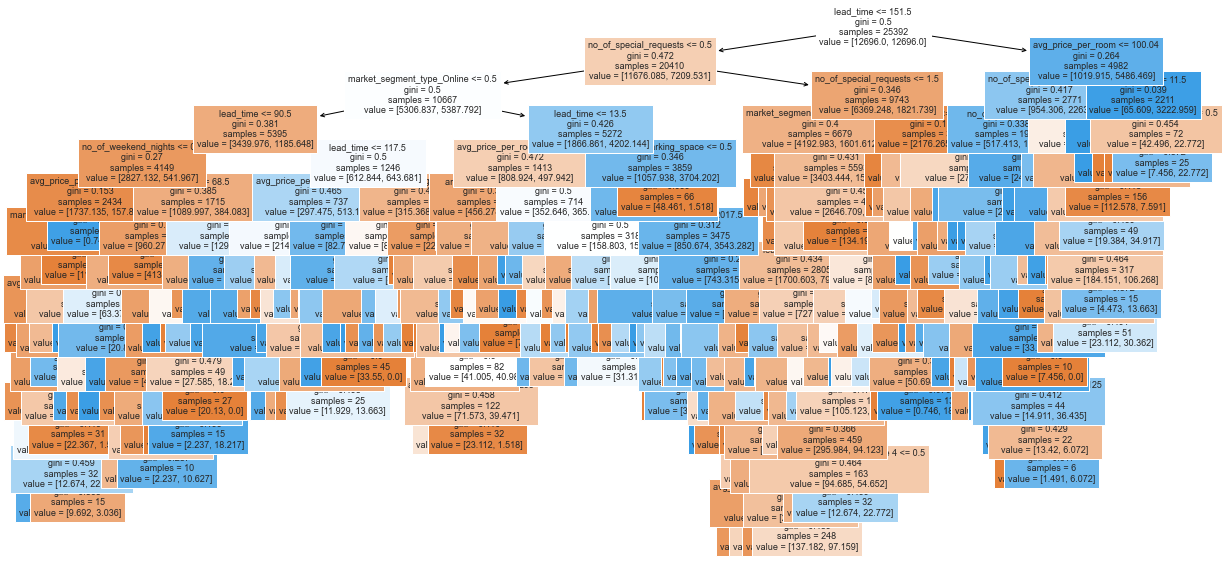

<IPython.core.display.Javascript object>

In [127]:
tree_diagram(best_model_2, X_train_tree)

The adjusted Post-Pruning model still looks very complex. It's not possible to describe it as it is.

Text-only, readable version:

In [128]:
print(tree.export_text(best_model_2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [163.28, 22.77] class: 0
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |  

<IPython.core.display.Javascript object>

**Observations:**
* The most important features remain unchanged.

#### Checking Feature Importance:

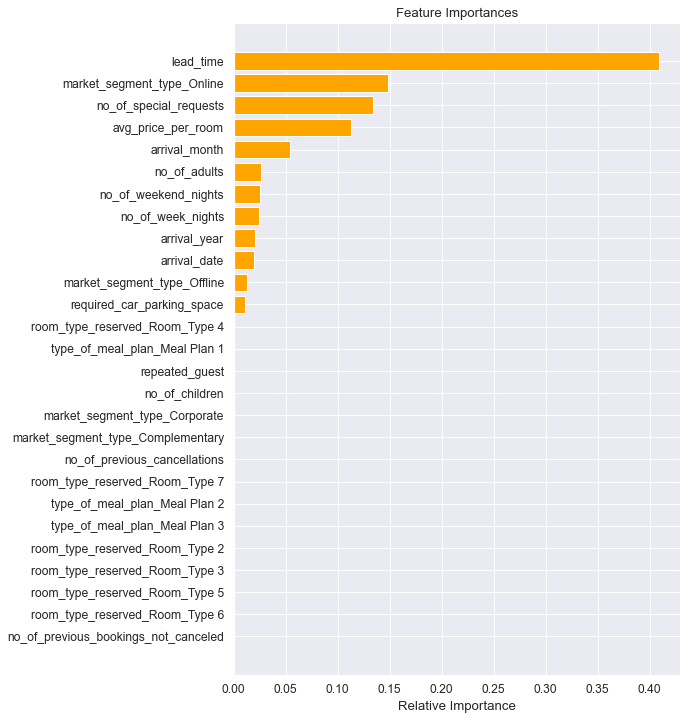

<IPython.core.display.Javascript object>

In [129]:
feat_importance(best_model_2, X_train_tree)

**Observations:**
* The most important features remain unchanged.

## Model Performance Comparison and Conclusions

From the observation of the recorded performance of every model built in this project, one will be selected for the purposes of making business recommendations.

### Summary of performance measure for all models

In [130]:
# display record of models' performance
model_perf_tracker

Model  Threshold  Nodes  Depth  \
0                                  Logit v4 - train    0.50000      0      0   
1                                   Logit v4 - test    0.50000      0      0   
2                  Logit v4 ROC-AUC-optimal - train    0.38375      0      0   
3                   Logit v4 ROC-AUC-optimal - test    0.38375      0      0   
4   Logit v4 Precision-Recall Curve-optimal - train    0.42000      0      0   
5    Logit v4 Precision-Recall Curve-optimal - test    0.42000      0      0   
6                                   CART v0 - train    0.00000   5913     37   
7                                    CART v0 - test    0.00000   5913     37   
8            CART + GridSearchCV PrePruning - train    0.00000     99      6   
9             CART + GridSearchCV PrePruning - test    0.00000     99      6   
10             CART + ccp-Alpha PostPruning - train    0.00000    813     22   
11              CART + ccp-Alpha PostPruning - test    0.00000    813     22   
12              CART + Adjusted PostPruning - train    0.00000    347     15   
13               CART + Adjusted PostPruning - test    0.00000    347     15   

    Accuracy  Recall  Precision      F1  
0    0.80744 0.63264    0.74143 0.68273  
1    0.80208 0.63204    0.72924 0.67717  
2    0.80027 0.72857    0.68280 0.70494  
3    0.79049 0.71745    0.66875 0.69225  
4    0.80358 0.70065    0.69989 0.70027  
5    0.79610 0.69336    0.68816 0.69075  
6    0.99421 0.98661    0.99578 0.99117  
7    0.87402 0.81459    0.79983 0.80715  
8    0.83105 0.78632    0.72431 0.75404  
9    0.83497 0.78336    0.72758 0.75444  
10   0.90024 0.90374    0.81391 0.85648  
11   0.86796 0.85662    0.76399 0.80766  
12   0.87559 0.85807    0.78443 0.81960  
13   0.86199 0.83901    0.75964 0.79736

<IPython.core.display.Javascript object>

**Observations:**
* Without considering the exploratory decision tree model, the best performance in terms of F1-score for the testing set is achieved by the Post-Pruned model without adjustment, followed by the adjusted or corrected Post-Pruned model.
* For this dataset and business problem, the Decision Tree models performed significantly better than the Logit regression model.
* Also the decision tree model makes it easier to understand and explain the relative importance of different features, which can help guide marketing strategy priorities.
* Still, as was said before, overfitting can cause large errors when predicting on new, unknown data.
* Also, the best-performing decision tree models are also the most complex (with hundreds of nodes).
* Because of this, an overfitting analysis needs to be undertaken:

### Checking relative performances between training and testing sets (overfitting)

In [131]:
# relative performance in training vs testing sets for each model (exploratory CART model is excluded)
train_test_perf = pd.DataFrame(
    {
        "Logit - default threshold": (
            model_perf_tracker.iloc[1, 4:] / model_perf_tracker.iloc[0, 4:] - 1
        )
        * 100,
        "Logit + ROC/AUC": (
            model_perf_tracker.iloc[3, 4:] / model_perf_tracker.iloc[2, 4:] - 1
        )
        * 100,
        "Logit + Precision-Recall curve": (
            model_perf_tracker.iloc[5, 4:] / model_perf_tracker.iloc[4, 4:] - 1
        )
        * 100,
        "CART + PrePruning": (
            model_perf_tracker.iloc[9, 4:] / model_perf_tracker.iloc[8, 4:] - 1
        )
        * 100,
        "CART + PostPruning": (
            model_perf_tracker.iloc[11, 4:] / model_perf_tracker.iloc[10, 4:] - 1
        )
        * 100,
        "CART + Adjusted PostPruning": (
            model_perf_tracker.iloc[13, 4:] / model_perf_tracker.iloc[12, 4:] - 1
        )
        * 100,
    }
)
train_test_perf

Logit - default threshold Logit + ROC/AUC  \
Accuracy                   -0.66427        -1.22182   
Recall                     -0.09601        -1.52747   
Precision                  -1.64408        -2.05663   
F1                         -0.81477        -1.80134   

          Logit + Precision-Recall curve CART + PrePruning CART + PostPruning  \
Accuracy                        -0.93068           0.47203           -3.58625   
Recall                          -1.04000          -0.37631           -5.21466   
Precision                       -1.67622           0.45223           -6.13364   
F1                              -1.35931           0.05326           -5.70041   

          CART + Adjusted PostPruning  
Accuracy                     -1.55371  
Recall                       -2.22050  
Precision                    -3.16071  
F1                           -2.71395

<IPython.core.display.Javascript object>

**Observations:**
* Among the best models (decision trees), the one tuned using pre-pruning shows the least overfitting of the three.
* The most overfitted of the three is the Post-Pruned model without adjustment
* On the other side, the difference between the F1-scores of the Revised Post-Pruned model and the Pre-Pruned model is about 6%
* Finally, the relative simplicity of the Pre-Pruned model makes it more likely that it will perform better on new data. Both post pruned models are extremely complex.
* For these reasons, reccomendations for the customer will be based on the **Pre-Pruned CART model**.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

### Some possible actions to help reduce booking cancelations:

* Lead times, market segment, special requests and price seem to be the main variables affecting .
* Program the booking interface to identify cancel-prone bookings at the time of reservation, using the selected classification model (keep it updated), and implement focused offers like the ones described below:
* Offer discounts for paying on advance some days or a week before the arrival date (if they cancel the special price will be lost).
* Keep in touch with the customer when the arrival date approaches, offering other services that might decrease the chance of cancelation, like special services ("requests"). Building rapport is also an effective way to make the customer feel more committed.
* Revise the no-refund policy.

### Reccomendations to reduce the impact of cancelations:

* Allow for a "soft" over-booking for cancel-prone reservations ("waiting list").
* Use multiple reservation channels, even AirBnB and the like, to get last-hour vacancies filled efficiently.

### Suggested further research and analysis:

* Gather more data to determine which if any of the most important features have causal relationships. If a causal relationship is indeed there, it can be better guide policy.
* More info about the cost of these measures and the cost of vacancies could help define better and more precise marketing strategies.
* More info is needed about the number of days in advance the cancelations are communicated to the hotel.
* More info is needed about the causes of cancelation (*force majeure* for example).
* Also gather data along a longer time span to help figure out any trend over time.